In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm

# Prepare regression data S&P 500 ESG

In [2]:
ff3_us = pd.read_excel(r"YOUR_PATH")
data_sp500_esg = pd.read_csv(r"YOUR_PATH").drop(columns="Unnamed: 0")
# Exclude data before January 1st, 2010 as base date of S&P500 ESG is April 30th, 2010
data_sp500_esg = data_sp500_esg.loc[
    data_sp500_esg.date >= "2010-01-01"
] 
data_sp500_esg.date = pd.to_datetime(data_sp500_esg.date)

/var/folders/_0/g08w2m052w15pxnz_l6xqngm0000gn/T/ipykernel_2081/3421300980.py:2: DtypeWarning: Columns (3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data_sp500_esg = pd.read_csv("/Users/timmuller/Documents/Uni/Master/Thesis/SP500ESG/sp500_comp_incl_esg_scores.csv").drop(columns="Unnamed: 0")


In [3]:
# Prepare returns and communication scores
data_sp500_returns = data_sp500_esg.pivot(index="date", columns="permno", values="ret")
data_sp500_environmental = data_sp500_esg.groupby(["permno", data_sp500_esg["date"].dt.year])["environmental_normalized"].first().unstack(level=0)
data_sp500_social = data_sp500_esg.groupby(["permno", data_sp500_esg["date"].dt.year])["social_normalized"].first().unstack(level=0)
data_sp500_governance = data_sp500_esg.groupby(["permno", data_sp500_esg["date"].dt.year])["governance_normalized"].first().unstack(level=0)
data_sp500_esg = data_sp500_esg.groupby(["permno", data_sp500_esg["date"].dt.year])["esg_normalized"].first().unstack(level=0)

In [4]:
# Calculate annual returns for each permno
sp500_annual_returns_yearly = data_sp500_returns.resample("YE").apply(lambda x: (x + 1).prod() - 1)
sp500_annual_returns_yearly.replace(0, np.nan, inplace=True)
sp500_annual_returns_yearly.index = sp500_annual_returns_yearly.index.year
sp500_annual_returns_yearly

permno,10104,10107,10137,10138,10145,10147,10225,10299,10324,10353,...,92988,93002,93089,93096,93132,93159,93246,93422,93429,93436
date,,,,,,,,,,,,,,,,,,,,,
2010,0.286068,-0.065313,0.060282,0.236977,0.394328,0.310823,0.417281,0.167388,0.452761,-0.191050,...,0.027582,0.557554,0.125500,0.367369,0.841225,NaN,0.259337,0.240333,-0.290192,0.114688
2011,-0.174602,-0.045209,0.030938,-0.098036,0.048827,-0.059394,0.098804,-0.105393,0.070927,NaN,...,-0.011288,0.028575,0.177527,0.341394,0.348378,NaN,0.733472,-0.191327,0.150369,0.072472
2012,0.317231,0.058363,NaN,0.186667,0.198594,0.174559,0.209487,0.187448,NaN,NaN,...,0.124751,0.116062,0.270115,0.071707,-0.036220,0.267004,0.577643,0.036097,0.191013,0.185920
2013,0.156840,0.442846,NaN,0.312869,0.470345,0.002120,0.129731,0.354386,NaN,NaN,...,0.393290,0.706809,0.289386,0.368118,-0.089912,0.002490,0.877280,0.015256,0.807750,3.441355
2014,0.189780,0.275442,NaN,0.047258,0.115452,0.206129,0.229736,0.025743,NaN,NaN,...,0.490201,0.931869,-0.025418,0.172083,0.602718,-0.439403,-0.174430,-0.338523,0.238227,0.478503
2015,-0.176293,0.226959,NaN,-0.122494,0.057985,-0.120549,NaN,-0.043370,NaN,-0.268166,...,0.009606,0.460389,0.200309,0.028829,0.016642,-0.470090,-0.363348,-0.334176,0.037624,0.079130
2016,0.068909,0.150660,NaN,0.084836,0.149903,0.140913,NaN,0.506508,NaN,-0.339903,...,NaN,0.236402,0.055805,0.043570,-0.033685,-0.365696,0.368492,0.373887,0.155185,-0.109670
2017,0.249350,0.407172,NaN,0.433882,0.350890,NaN,NaN,0.047820,NaN,NaN,...,NaN,0.481959,0.182701,0.269170,0.450539,-0.387966,0.215519,-0.480174,0.704649,0.457014
2018,-0.029731,0.207989,NaN,-0.097408,-0.084042,NaN,NaN,NaN,NaN,NaN,...,NaN,0.021582,0.135833,0.175481,0.612047,-0.393342,0.003626,-0.411704,-0.205978,0.068893


In [5]:
# Keep only permnos with at least 10 years of data
non_nan_counts = sp500_annual_returns_yearly.notna().sum()
columns_to_keep = non_nan_counts[non_nan_counts >= 10].index
sp500_annual_returns_yearly = sp500_annual_returns_yearly[columns_to_keep]
sp500_annual_returns_yearly

permno,10104,10107,10138,10145,10516,10693,10696,10874,10890,10909,...,92655,92778,93002,93089,93096,93132,93246,93422,93429,93436
date,,,,,,,,,,,,,,,,,,,,,
2010,0.286068,-0.065313,0.236977,0.394328,-0.019297,0.103358,0.207929,0.478834,-0.328578,0.149201,...,0.198921,0.383493,0.557554,0.125500,0.367369,0.841225,0.259337,0.240333,-0.290192,0.114688
2011,-0.174602,-0.045209,-0.098036,0.048827,-0.029052,-0.146784,0.003079,-0.033368,-0.238701,0.293014,...,0.421875,0.027529,0.028575,0.177527,0.341394,0.348378,0.733472,-0.191327,0.150369,0.072472
2012,0.317231,0.058363,0.186667,0.198594,-0.018325,0.194681,0.345416,0.614096,-0.122279,0.265465,...,0.085888,0.551722,0.116062,0.270115,0.071707,-0.036220,0.577643,0.036097,0.191013,0.185920
2013,0.156840,0.442846,0.312869,0.470345,0.618532,0.595277,0.494361,0.586949,0.940476,0.438267,...,0.410323,0.433519,0.706809,0.289386,0.368118,-0.089912,0.877280,0.015256,0.807750,3.441355
2014,0.189780,0.275442,0.047258,0.115452,0.223255,0.178956,0.201866,0.124353,-0.121829,0.160025,...,0.364573,-0.195805,0.931869,-0.025418,0.172083,0.602718,-0.174430,-0.338523,0.238227,0.478503
2015,-0.176293,0.226959,-0.122494,0.057985,-0.277214,-0.074967,0.288722,-0.004866,-0.625171,-0.069451,...,0.182579,-0.252076,0.460389,0.200309,0.028829,0.016642,-0.363348,-0.334176,0.037624,0.079130
2016,0.068909,0.150660,0.084836,0.149903,0.283967,0.213164,0.162040,0.094512,0.352940,-0.212734,...,0.384062,0.061854,0.236402,0.055805,0.043570,-0.033685,0.368492,0.373887,0.155185,-0.109670
2017,0.249350,0.407172,0.433882,0.350890,-0.094740,0.223520,0.233818,0.025306,-0.454850,0.422631,...,0.398258,-0.209494,0.481959,0.182701,0.269170,0.450539,0.215519,-0.480174,0.704649,0.457014
2018,-0.029731,0.207989,-0.097408,-0.084042,0.052607,0.268712,0.120868,-0.147650,0.426997,-0.221841,...,0.145204,0.090228,0.021582,0.135833,0.175481,0.612047,0.003626,-0.411704,-0.205978,0.068893


In [6]:
# Do the same selection for communication data
data_sp500_environmental = data_sp500_environmental[columns_to_keep]
data_sp500_social = data_sp500_social[columns_to_keep]
data_sp500_governance = data_sp500_governance[columns_to_keep]
data_sp500_esg = data_sp500_esg[columns_to_keep]

In [7]:
sp500_combined_data = pd.DataFrame({
    "year": np.repeat(sp500_annual_returns_yearly.index, sp500_annual_returns_yearly.shape[1]),
    "permno": np.tile(sp500_annual_returns_yearly.columns, len(sp500_annual_returns_yearly)),
    "return": sp500_annual_returns_yearly.values.ravel(),
    "environmental": data_sp500_environmental.values.ravel(),
    "social": data_sp500_social.values.ravel(),
    "governance": data_sp500_governance.values.ravel(),
    "esg": data_sp500_esg.values.ravel()
})
sp500_combined_data = sp500_combined_data.dropna().sort_values(by=["permno", "year"]).reset_index(drop=True)
sp500_combined_data

,year,permno,return,environmental,social,governance,esg
0,2010,10104,0.286068,0.012892,0.004525,0.152882,0.048954
1,2011,10104,-0.174602,0.011942,0.004791,0.157807,0.049795
2,2012,10104,0.317231,0.013566,0.003175,0.156858,0.049495
3,2013,10104,0.156840,0.011998,0.003209,0.162611,0.050028
4,2014,10104,0.189780,0.018793,0.003198,0.158028,0.052917
...,...,...,...,...,...,...,...
6239,2019,93436,0.256994,0.698191,0.007427,0.084680,0.441877
6240,2020,93436,7.434376,0.572414,0.005552,0.112551,0.372764
6241,2021,93436,0.497551,0.457282,0.017236,0.116464,0.312602
6242,2022,93436,-0.650317,0.486991,0.062080,0.206738,0.381508


# Scatter Plots annual returns - communication score S&P 500 ESG

In [8]:
# Define a function to create the plot
def plot_score_vs_return(ax, score_name, score_data, returns_data):
    sns.set_theme(style="whitegrid")
    
    # Scatter plot without the trend line
    sns.regplot(ax=ax, x=score_data, y=returns_data, scatter_kws={"color": "steelblue"}, line_kws={"color": "darkred", "linestyle": "--", "linewidth": 2}, ci=None)
    
    ax.set_title(f"Annual Return - Normalized {score_name} Communication Score", fontsize=16)
    ax.set_xlabel(f"Normalized {score_name} Communication Score")
    ax.set_ylabel("Annual Return (%)")
    
    # Format y-axis labels as percentages
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1, symbol="%"))
    
    ax.grid(True)

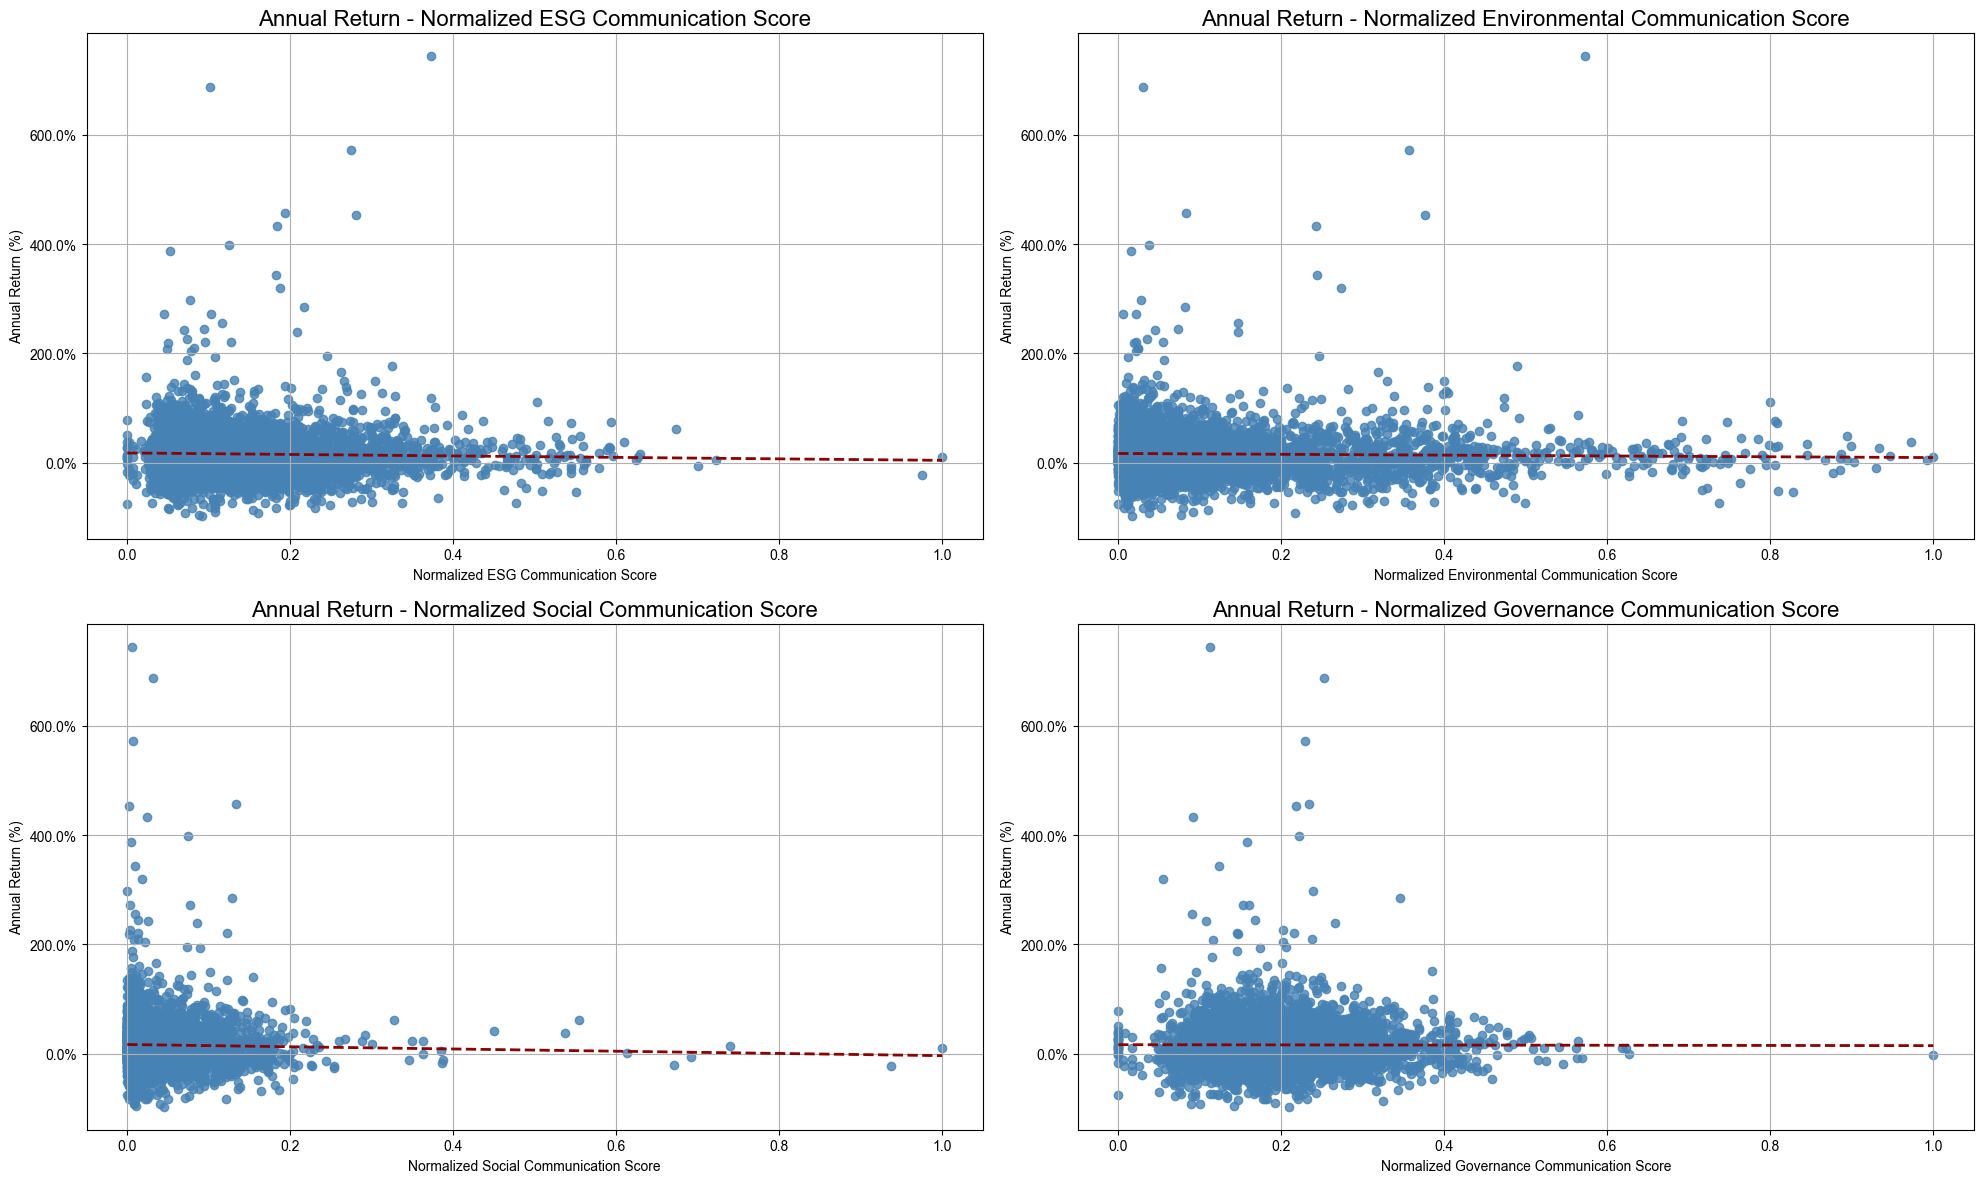

In [9]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the score names and plot the scatter plots
for i, score_name in enumerate(["esg", "environmental", "social", "governance"]):
    score_data = sp500_combined_data[score_name]
    # Transform "esg" to "ESG"
    display_name = "ESG" if score_name == "esg" else score_name.capitalize()
    plot_score_vs_return(axes[i], display_name, score_data, sp500_combined_data["return"])

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("YOUR_PATH")
plt.show()

# Correlation Matrix S&P 500 ESG

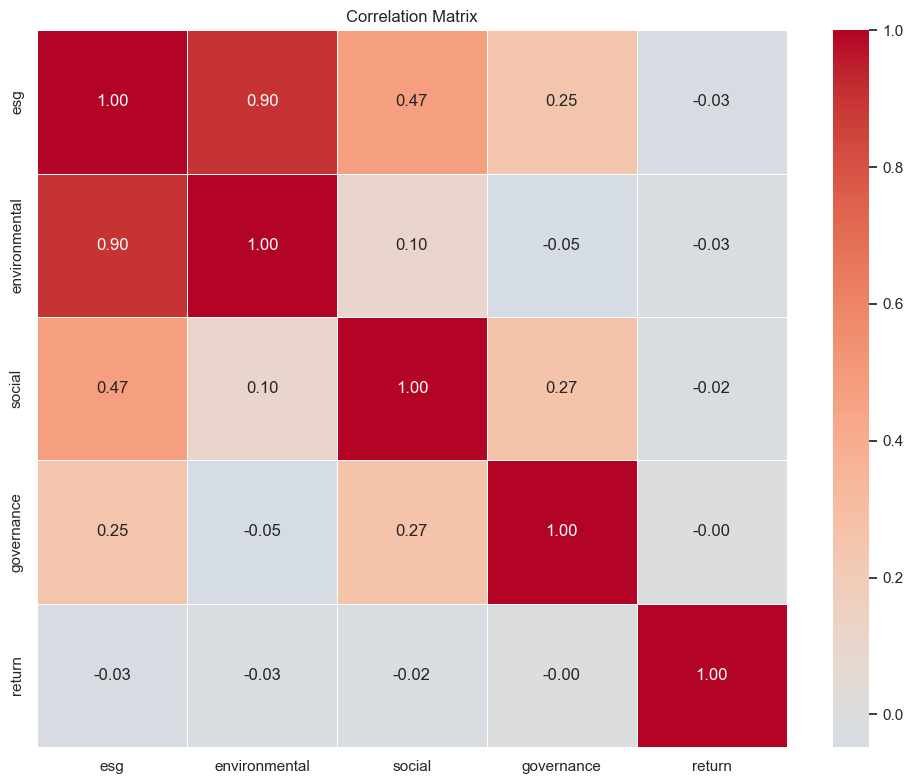

In [10]:
# Compute the correlation matrix
correlation_data = sp500_combined_data[["esg", "environmental", "social", "governance", "return"]]
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig(
    f"YOUR_PATH"
)
plt.show()

# FF3 Regression on yearly returns and yearly communication score - S&P 500 ESG

In [11]:
merged_df_sp500 = sp500_combined_data.reset_index().merge(ff3_us, on="year").set_index(["permno", "year"])
merged_df_sp500 = merged_df_sp500.sort_index()
merged_df_sp500

index    return  environmental    social  governance       esg  \
permno year                                                                   
10104  2010      0  0.286068       0.012892  0.004525    0.152882  0.048954   
       2011      1 -0.174602       0.011942  0.004791    0.157807  0.049795   
       2012      2  0.317231       0.013566  0.003175    0.156858  0.049495   
       2013      3  0.156840       0.011998  0.003209    0.162611  0.050028   
       2014      4  0.189780       0.018793  0.003198    0.158028  0.052917   
...            ...       ...            ...       ...         ...       ...   
93436  2019   6239  0.256994       0.698191  0.007427    0.084680  0.441877   
       2020   6240  7.434376       0.572414  0.005552    0.112551  0.372764   
       2021   6241  0.497551       0.457282  0.017236    0.116464  0.312602   
       2022   6242 -0.650317       0.486991  0.062080    0.206738  0.381508   
       2023   6243  1.017232       0.473348  0.068457    0.207189  0.377553   

             Mkt-RF     SMB     HML      RF  
permno year                                  
10104  2010  0.1737  0.1415 -0.0517  0.0012  
       2011  0.0044 -0.0573 -0.0841  0.0004  
       2012  0.1627 -0.0140  0.0999  0.0006  
       2013  0.3520  0.0773  0.0260  0.0002  
       2014  0.1171 -0.0780 -0.0145  0.0002  
...             ...     ...     ...     ...  
93436  2019  0.2828 -0.0614 -0.1046  0.0215  
       2020  0.2366  0.1318 -0.4667  0.0045  
       2021  0.2356 -0.0389  0.2549  0.0004  
       2022 -0.2160 -0.0695  0.2581  0.0143  
       2023  0.2170 -0.0324 -0.1360  0.0495  

[6244 rows x 10 columns]

In [12]:
# FF3 on environmental factor
results = []
for permno in merged_df_sp500.index.get_level_values(0).unique():
    # Filter data for the current permno
    data = merged_df_sp500.loc[permno]
    
    # Define Y and X variables
    Y = data["return"]
    X = data[["environmental", "Mkt-RF", "SMB", "HML", "RF"]]
    
    # Add a constant to the model (intercept)
    X = sm.add_constant(X)
    if "const" not in X:
        print(f""const" not found in coefficients for permo {permno}")
        print(X)
    
    # Fit the regression model
    model = sm.OLS(Y, X).fit()
    
    # Extract coefficients and p-values
    coeffs = model.params
    pvals = model.pvalues

    if "const" not in coeffs:
        print(f""const" not found in coefficients for permo {permno}")
        

    # Store the results in a dictionary
    result = {
        "permno": permno,
        "const_coef": coeffs["const"],
        "const_pval": pvals["const"],
        "environmental_coef": coeffs["environmental"],
        "environmental_pval": pvals["environmental"],
        "Mkt-RF_coef": coeffs["Mkt-RF"],
        "Mkt-RF_pval": pvals["Mkt-RF"],
        "SMB_coef": coeffs["SMB"],
        "SMB_pval": pvals["SMB"],
        "HML_coef": coeffs["HML"],
        "HML_pval": pvals["HML"],
        "RF_coef": coeffs["RF"],
        "RF_pval": pvals["RF"]
    }
    
    results.append(result)

# Convert results to a DataFrame
sp500_results_df_environmental = pd.DataFrame(results).set_index("permno")
sp500_results_df_environmental

,const_coef,const_pval,environmental_coef,environmental_pval,Mkt-RF_coef,Mkt-RF_pval,SMB_coef,SMB_pval,HML_coef,HML_pval,RF_coef,RF_pval
permno,,,,,,,,,,,,
10104,-0.145462,0.260638,7.997530,0.203188,0.908724,0.009399,0.358896,0.553743,0.182631,0.415237,-1.458835,0.747662
10516,0.048704,0.812547,0.509084,0.745709,0.428100,0.450778,0.656378,0.561925,0.665742,0.175093,-4.512838,0.615628
10693,0.192998,0.102014,-7.223520,0.192786,0.147588,0.723948,0.872471,0.346834,0.360354,0.370442,3.748000,0.421668
10696,0.093507,0.269676,-54.031561,0.312255,0.821351,0.070023,-0.528003,0.544561,0.025700,0.934481,5.488875,0.299694
10909,-0.050480,0.752432,9.344422,0.618666,1.004684,0.059867,-1.293957,0.189259,-0.162751,0.632250,-4.641679,0.660320
...,...,...,...,...,...,...,...,...,...,...,...,...
93132,0.417927,0.373277,-4.551786,0.674419,0.937620,0.420994,-1.205521,0.615589,-0.020576,0.982496,0.087320,0.996087
93246,0.084894,0.720967,-0.177943,0.908706,2.276527,0.030931,0.731178,0.705370,-0.646200,0.405259,-2.703470,0.841397
93422,0.084574,0.890532,-0.556259,0.780031,0.408330,0.492360,1.825237,0.108159,1.734594,0.003721,1.226203,0.918522


In [13]:
sp500_averaged_results_environmental = sp500_results_df_environmental.mean()
sp500_averaged_results_environmental

const_coef            0.026891
const_pval            0.457609
environmental_coef   -0.057421
environmental_pval    0.503145
Mkt-RF_coef           0.967727
Mkt-RF_pval           0.227720
SMB_coef              0.018504
SMB_pval              0.459078
HML_coef              0.244192
HML_pval              0.398712
RF_coef              -1.783387
RF_pval               0.508732
dtype: float64

In [83]:
len(sp500_results_df_environmental[sp500_results_df_environmental["environmental_pval"]<=0.05])

20

In [81]:
significant_sp500_results_df_environmental = sp500_results_df_environmental[sp500_results_df_environmental["environmental_pval"]<=0.05]
significant_sp500_results_df_environmental.mean()

const_coef            -0.037397
const_pval             0.094657
environmental_coef    15.431611
environmental_pval     0.023915
Mkt-RF_coef            1.341040
Mkt-RF_pval            0.180563
SMB_coef              -0.043004
SMB_pval               0.363584
HML_coef               0.300976
HML_pval               0.311732
RF_coef              -10.759771
RF_pval                0.283656
dtype: float64

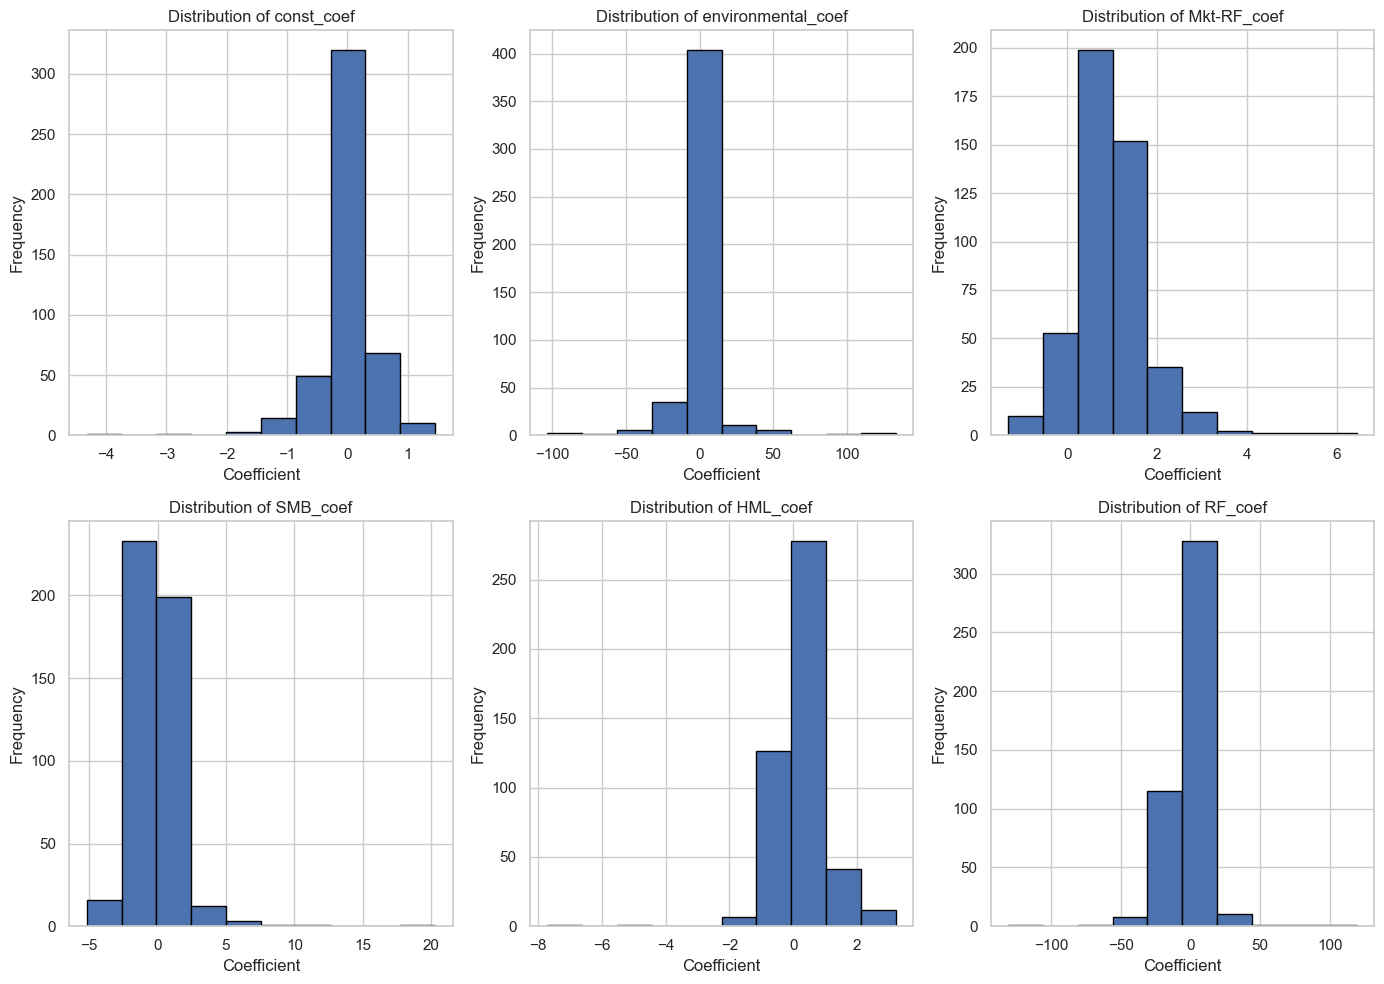

In [18]:
# Plot histograms for each coefficient
coeff_columns = ["const_coef", "environmental_coef", "Mkt-RF_coef", "SMB_coef", "HML_coef", "RF_coef"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(coeff_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(sp500_results_df_environmental[col].dropna(), bins=10, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Coefficient")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

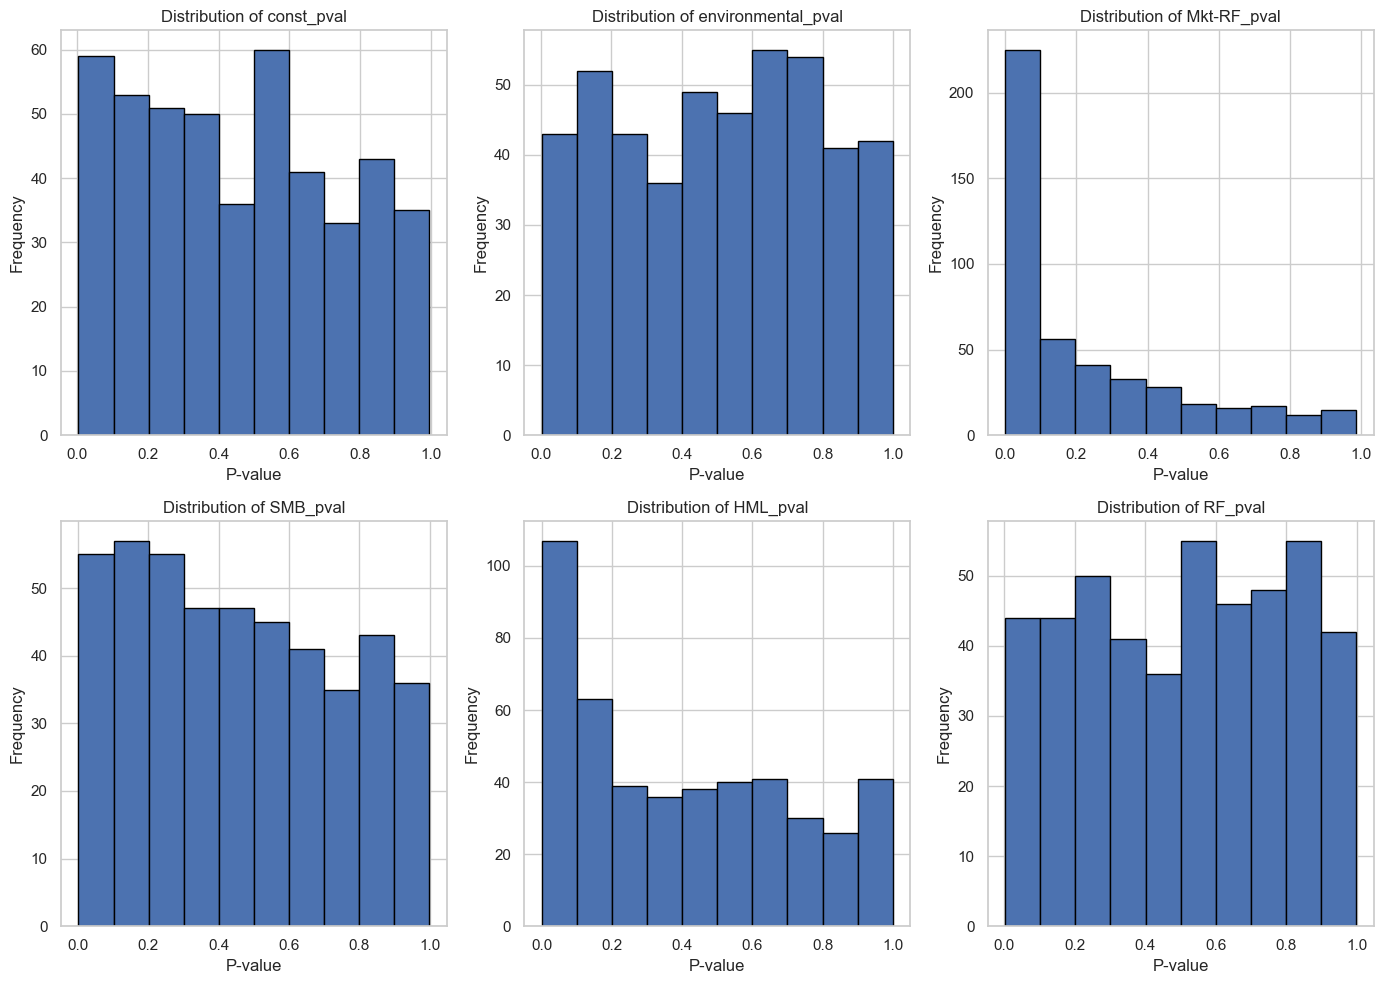

In [19]:
# Plot histograms for each coefficient
pval_columns = ["const_pval", "environmental_pval", "Mkt-RF_pval", "SMB_pval", "HML_pval", "RF_pval"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(pval_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(sp500_results_df_environmental[col].dropna(), bins=10, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel("P-value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [20]:
# FF3 on social factor
results = []
for permno in merged_df_sp500.index.get_level_values(0).unique():
    # Filter data for the current permno
    data = merged_df_sp500.loc[permno]
    
    # Define Y and X variables
    Y = data["return"]
    X = data[["social", "Mkt-RF", "SMB", "HML", "RF"]]
    
    # Add a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Fit the regression model
    model = sm.OLS(Y, X).fit()
    
    # Extract coefficients and p-values
    coeffs = model.params
    pvals = model.pvalues
    
    # Store the results in a dictionary
    result = {
        "permno": permno,
        "const_coef": coeffs["const"],
        "const_pval": pvals["const"],
        "social_coef": coeffs["social"],
        "social_pval": pvals["social"],
        "Mkt-RF_coef": coeffs["Mkt-RF"],
        "Mkt-RF_pval": pvals["Mkt-RF"],
        "SMB_coef": coeffs["SMB"],
        "SMB_pval": pvals["SMB"],
        "HML_coef": coeffs["HML"],
        "HML_pval": pvals["HML"],
        "RF_coef": coeffs["RF"],
        "RF_pval": pvals["RF"]
    }
    
    results.append(result)

# Convert results to a DataFrame
sp500_results_df_social = pd.DataFrame(results).set_index("permno")
sp500_results_df_social

,const_coef,const_pval,social_coef,social_pval,Mkt-RF_coef,Mkt-RF_pval,SMB_coef,SMB_pval,HML_coef,HML_pval,RF_coef,RF_pval
permno,,,,,,,,,,,,
10104,-0.016062,0.788927,2.174553,0.276992,0.896335,0.011511,0.235019,0.703249,0.068573,0.795800,-0.045134,0.991309
10516,0.080879,0.488113,1.049472,0.613409,0.383893,0.462822,0.530868,0.641486,0.595451,0.244463,-5.364606,0.520817
10693,0.204866,0.103037,-4.176714,0.201805,0.118678,0.778274,1.038788,0.269948,0.339657,0.392064,8.436081,0.201563
10696,0.216575,0.015638,-10.913863,0.014001,0.858974,0.015083,-0.394566,0.527897,0.431888,0.128818,7.327400,0.059910
10909,0.133558,0.577572,-3.089985,0.589244,1.191750,0.027257,-1.681843,0.124699,0.030181,0.941428,-2.098954,0.804223
...,...,...,...,...,...,...,...,...,...,...,...,...
93132,0.216090,0.392034,3.028890,0.750649,1.187634,0.323846,-1.376786,0.573314,-0.340997,0.737597,-9.011163,0.581992
93246,0.008094,0.973413,4.107136,0.726802,2.331135,0.024747,0.619728,0.743851,-0.853229,0.324246,-6.814099,0.595348
93422,-0.271198,0.015102,15.835680,0.011164,0.058472,0.862002,2.619445,0.004238,1.384074,0.001021,8.388471,0.206999


In [21]:
sp500_averaged_results_social = sp500_results_df_social.mean()
sp500_averaged_results_social

const_coef     0.045274
const_pval     0.456809
social_coef    1.556961
social_pval    0.487715
Mkt-RF_coef    0.996312
Mkt-RF_pval    0.216082
SMB_coef       0.026537
SMB_pval       0.464384
HML_coef       0.226805
HML_pval       0.407154
RF_coef       -1.977906
RF_pval        0.495189
dtype: float64

In [84]:
len(sp500_results_df_social[sp500_results_df_social["social_pval"]<=0.05])

34

In [23]:
significant_sp500_results_df_social = sp500_results_df_social[sp500_results_df_social["social_pval"]<=0.05]
significant_sp500_results_df_social.mean()

const_coef      0.014669
const_pval      0.194689
social_coef     5.085948
social_pval     0.019310
Mkt-RF_coef     1.148339
Mkt-RF_pval     0.161355
SMB_coef        0.447810
SMB_pval        0.379423
HML_coef        0.191762
HML_pval        0.269094
RF_coef       -10.762869
RF_pval         0.247546
dtype: float64

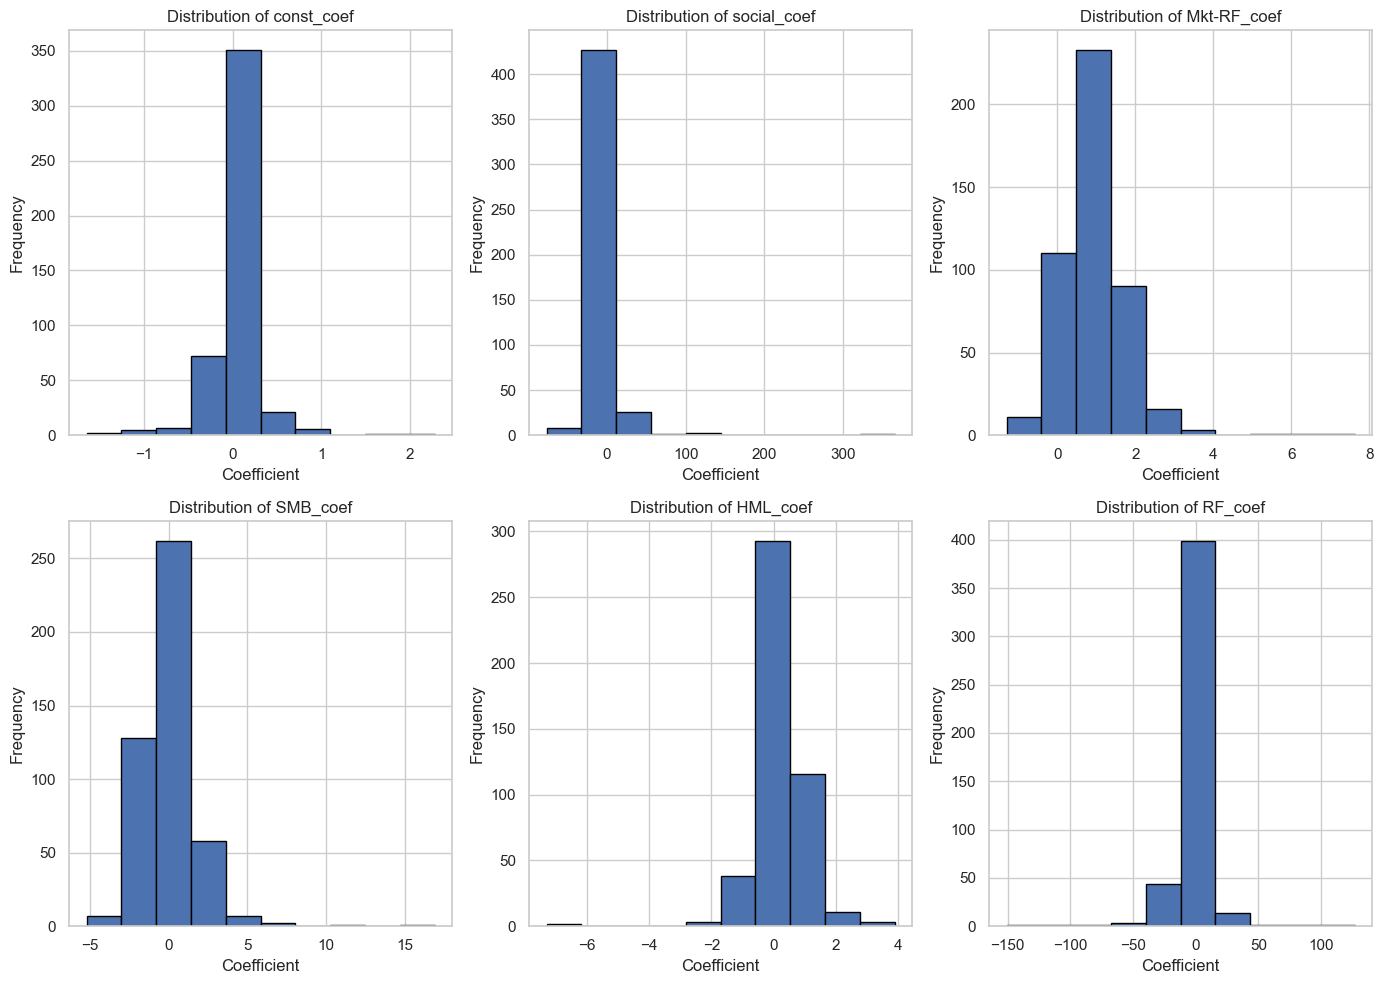

In [25]:
# Plot histograms for each coefficient
coeff_columns = ["const_coef", "social_coef", "Mkt-RF_coef", "SMB_coef", "HML_coef", "RF_coef"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(coeff_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(sp500_results_df_social[col].dropna(), bins=10, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Coefficient")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

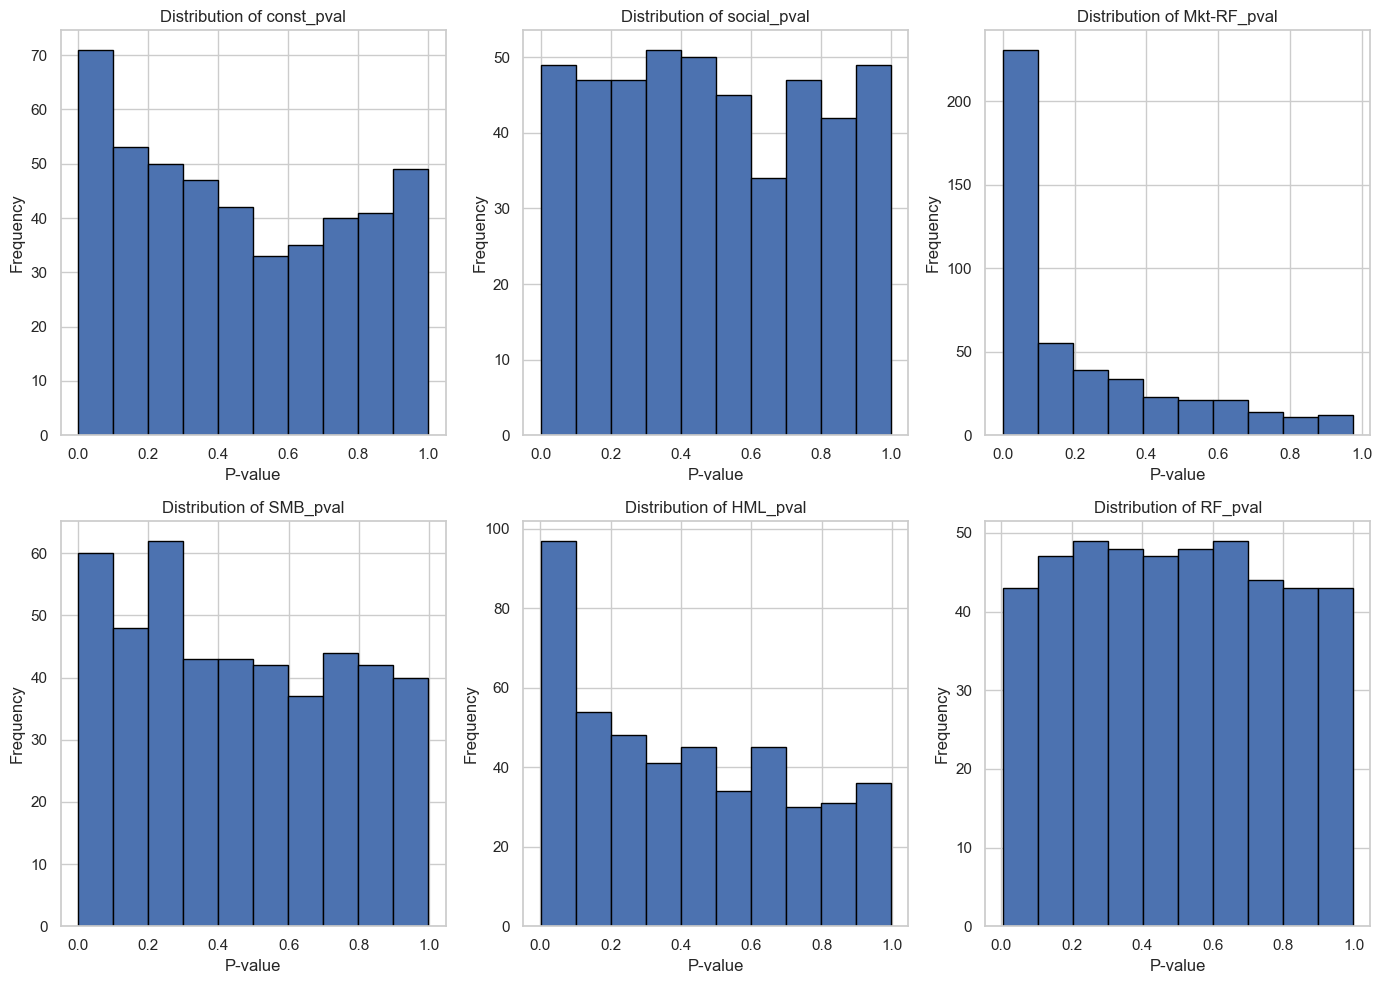

In [26]:
# Plot histograms for each coefficient
pval_columns = ["const_pval", "social_pval", "Mkt-RF_pval", "SMB_pval", "HML_pval", "RF_pval"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(pval_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(sp500_results_df_social[col].dropna(), bins=10, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel("P-value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [27]:
# FF3 on governance factor
results = []
for permno in merged_df_sp500.index.get_level_values(0).unique():
    # Filter data for the current permno
    data = merged_df_sp500.loc[permno]
    
    # Define Y and X variables
    Y = data["return"]
    X = data[["governance", "Mkt-RF", "SMB", "HML", "RF"]]
    
    # Add a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Fit the regression model
    model = sm.OLS(Y, X).fit()
    
    # Extract coefficients and p-values
    coeffs = model.params
    pvals = model.pvalues
    
    # Store the results in a dictionary
    result = {
        "permno": permno,
        "const_coef": coeffs["const"],
        "const_pval": pvals["const"],
        "governance_coef": coeffs["governance"],
        "governance_pval": pvals["governance"],
        "Mkt-RF_coef": coeffs["Mkt-RF"],
        "Mkt-RF_pval": pvals["Mkt-RF"],
        "SMB_coef": coeffs["SMB"],
        "SMB_pval": pvals["SMB"],
        "HML_coef": coeffs["HML"],
        "HML_pval": pvals["HML"],
        "RF_coef": coeffs["RF"],
        "RF_pval": pvals["RF"]
    }
    
    results.append(result)

# Convert results to a DataFrame
sp500_results_df_governance = pd.DataFrame(results).set_index("permno")
sp500_results_df_governance

,const_coef,const_pval,governance_coef,governance_pval,Mkt-RF_coef,Mkt-RF_pval,SMB_coef,SMB_pval,HML_coef,HML_pval,RF_coef,RF_pval
permno,,,,,,,,,,,,
10104,-0.300240,0.316927,1.858047,0.302798,0.845837,0.016031,0.257569,0.678654,0.156405,0.511456,-0.280971,0.949435
10516,0.105779,0.478517,0.000974,0.997769,0.360642,0.506738,0.649999,0.578198,0.737040,0.110342,-2.249947,0.697172
10693,0.968691,0.231414,-8.648729,0.276045,0.123308,0.776699,1.429204,0.185277,-0.028543,0.934483,4.765669,0.356372
10696,-0.532069,0.028341,2.145020,0.012630,0.740788,0.026344,-0.397867,0.519638,0.114213,0.612790,7.022117,0.063223
10909,-0.663803,0.120552,2.722376,0.107866,1.071368,0.015584,-1.323117,0.107097,-0.115534,0.668854,2.650585,0.721567
...,...,...,...,...,...,...,...,...,...,...,...,...
93132,1.577984,0.118751,-6.710321,0.170512,0.820002,0.419998,-1.501825,0.487783,0.194953,0.810707,5.478418,0.675506
93246,-0.000860,0.999173,0.329580,0.933478,2.294102,0.027200,0.760782,0.714413,-0.680782,0.337731,-3.944432,0.682826
93422,-0.668359,0.045903,3.150931,0.061114,0.388317,0.372304,2.530649,0.016861,1.574977,0.001467,7.254570,0.387617


In [28]:
sp500_averaged_results_governance = sp500_results_df_governance.mean()
sp500_averaged_results_governance

const_coef         0.051001
const_pval         0.493382
governance_coef    0.006916
governance_pval    0.508355
Mkt-RF_coef        0.981421
Mkt-RF_pval        0.226663
SMB_coef          -0.008576
SMB_pval           0.459829
HML_coef           0.245200
HML_pval           0.385998
RF_coef           -1.325443
RF_pval            0.490702
dtype: float64

In [85]:
len(sp500_results_df_governance[sp500_results_df_governance["governance_pval"]<=0.05])

22

In [30]:
significant_sp500_results_df_governance =sp500_results_df_governance[sp500_results_df_governance["governance_pval"]<=0.05]
significant_sp500_results_df_governance

const_coef        -0.170884
const_pval         0.052531
governance_coef    2.180150
governance_pval    0.021206
Mkt-RF_coef        1.061914
Mkt-RF_pval        0.198727
SMB_coef           0.474570
SMB_pval           0.311480
HML_coef          -0.272258
HML_pval           0.295808
RF_coef           -7.943745
RF_pval            0.275698
dtype: float64

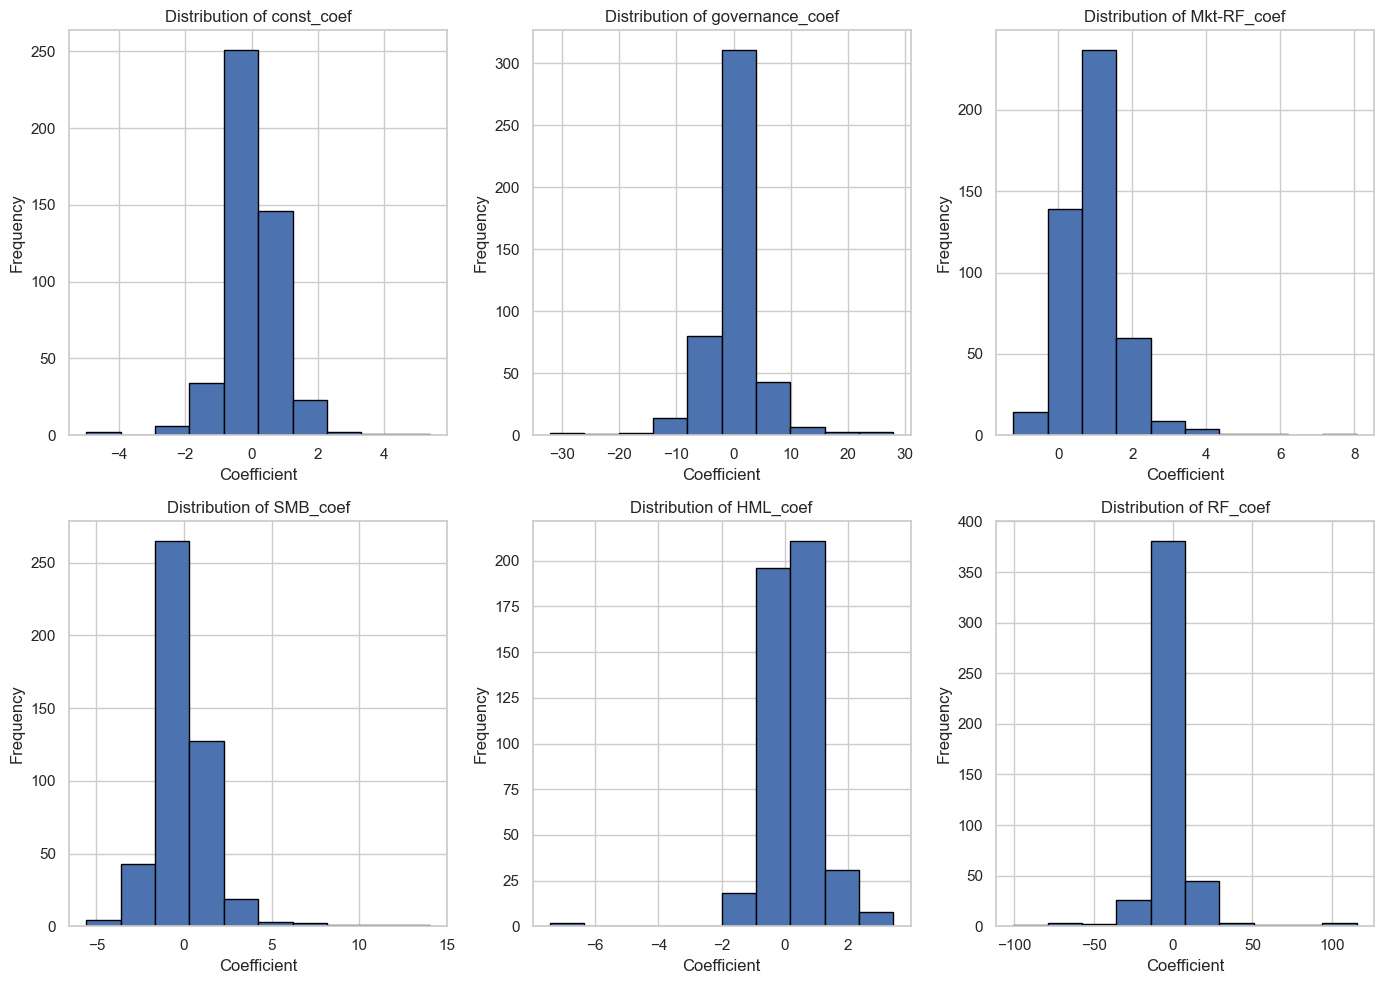

In [32]:
# Plot histograms for each coefficient
coeff_columns = ["const_coef", "governance_coef", "Mkt-RF_coef", "SMB_coef", "HML_coef", "RF_coef"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(coeff_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(sp500_"[col].dropna(), bins=10, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Coefficient")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

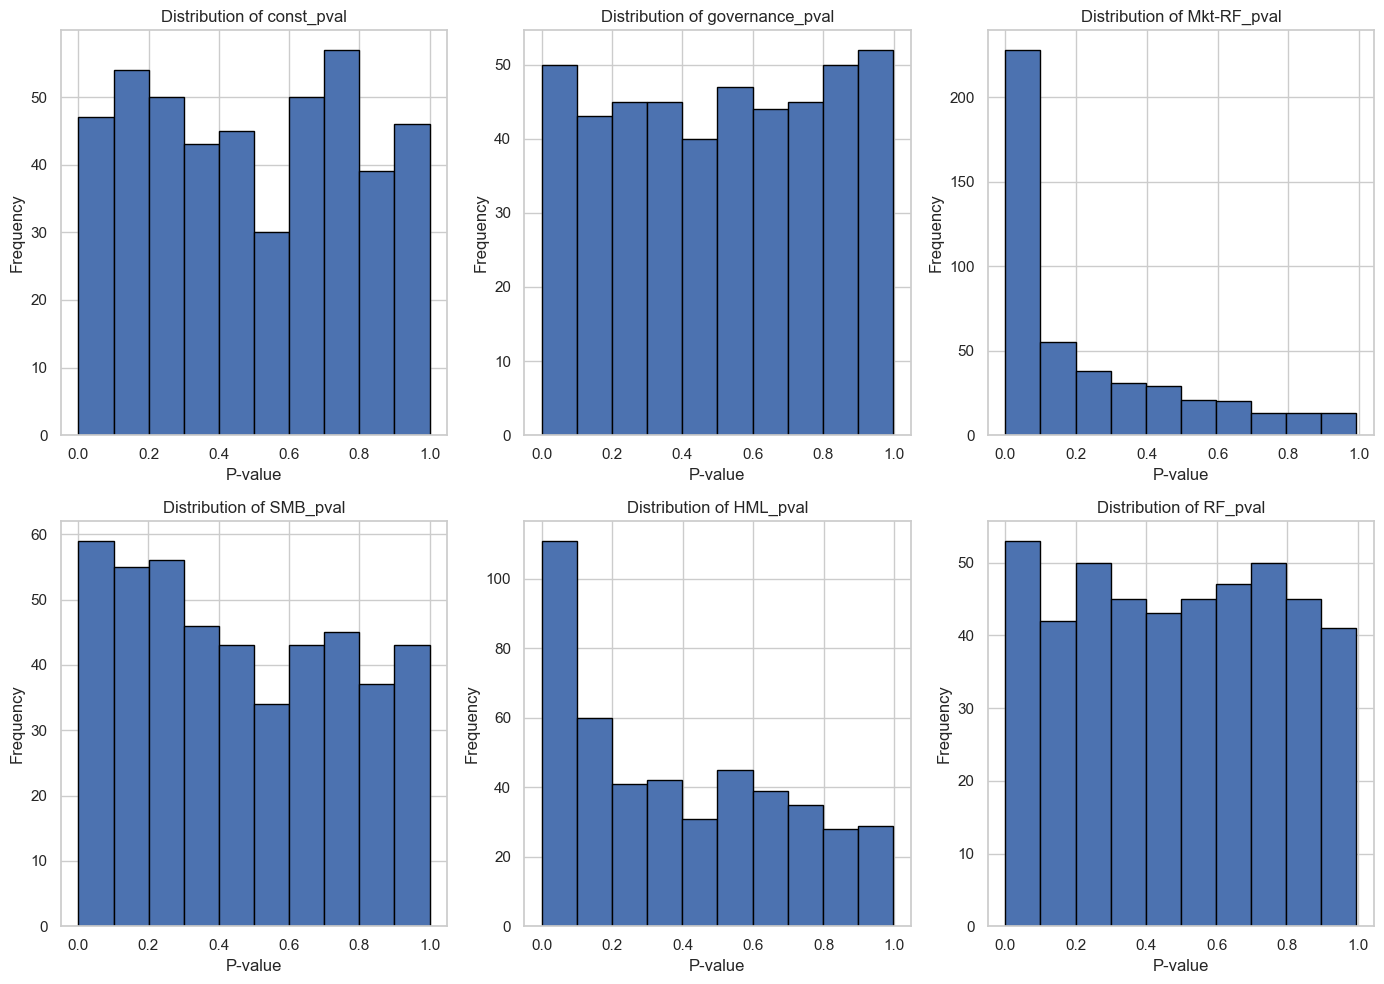

In [33]:
# Plot histograms for each coefficient
pval_columns = ["const_pval", "governance_pval", "Mkt-RF_pval", "SMB_pval", "HML_pval", "RF_pval"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(pval_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(sp500_"=10, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel("P-value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [34]:
# FF3 on esg factor
results = []
for permno in merged_df_sp500.index.get_level_values(0).unique():
    # Filter data for the current permno
    data = merged_df_sp500.loc[permno]
    
    # Define Y and X variables
    Y = data["return"]
    X = data[["esg", "Mkt-RF", "SMB", "HML", "RF"]]
    
    # Add a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Fit the regression model
    model = sm.OLS(Y, X).fit()
    
    # Extract coefficients and p-values
    coeffs = model.params
    pvals = model.pvalues
    
    # Store the results in a dictionary
    result = {
        "permno": permno,
        "const_coef": coeffs["const"],
        "const_pval": pvals["const"],
        "esg_coef": coeffs["esg"],
        "esg_pval": pvals["esg"],
        "Mkt-RF_coef": coeffs["Mkt-RF"],
        "Mkt-RF_pval": pvals["Mkt-RF"],
        "SMB_coef": coeffs["SMB"],
        "SMB_pval": pvals["SMB"],
        "HML_coef": coeffs["HML"],
        "HML_pval": pvals["HML"],
        "RF_coef": coeffs["RF"],
        "RF_pval": pvals["RF"]
    }
    
    results.append(result)

# Convert results to a DataFrame
sp500_results_df_esg = pd.DataFrame(results).set_index("permno")
sp500_results_df_esg

,const_coef,const_pval,esg_coef,esg_pval,Mkt-RF_coef,Mkt-RF_pval,SMB_coef,SMB_pval,HML_coef,HML_pval,RF_coef,RF_pval
permno,,,,,,,,,,,,
10104,-0.123183,0.315704,2.189246,0.246213,0.885266,0.011521,0.258222,0.672187,0.097141,0.694387,-0.659788,0.879287
10516,0.068006,0.706492,0.243862,0.794717,0.405293,0.465747,0.680041,0.551274,0.714504,0.114814,-3.149721,0.634429
10693,0.312007,0.091737,-4.337628,0.172342,0.118658,0.774747,1.039857,0.262585,0.340808,0.376740,7.141592,0.212072
10696,-0.580433,0.178787,8.281349,0.126406,0.672086,0.094352,-0.431622,0.587372,-0.092013,0.754462,4.339284,0.303613
10909,-0.384288,0.425048,4.371168,0.400289,0.987684,0.047237,-1.116062,0.251709,-0.253817,0.478349,-0.150695,0.985441
...,...,...,...,...,...,...,...,...,...,...,...,...
93132,0.462366,0.413873,-2.707136,0.675726,0.928662,0.427760,-1.195434,0.618733,0.012426,0.989797,-0.430044,0.979761
93246,0.078192,0.805264,-0.093517,0.965577,2.292977,0.029105,0.699615,0.714584,-0.669104,0.389833,-3.408665,0.797091
93422,-0.527695,0.391359,1.885223,0.460116,0.293060,0.604756,1.846354,0.090521,1.664585,0.004112,-2.581460,0.793786


In [35]:
sp500_averaged_results_esg = sp500_results_df_esg.mean()
sp500_averaged_results_esg

const_coef     0.031011
const_pval     0.472421
esg_coef       0.018489
esg_pval       0.504792
Mkt-RF_coef    0.976211
Mkt-RF_pval    0.229073
SMB_coef       0.031162
SMB_pval       0.461054
HML_coef       0.232470
HML_pval       0.392516
RF_coef       -1.665477
RF_pval        0.489561
dtype: float64

In [86]:
len(sp500_results_df_esg[sp500_results_df_esg["esg_pval"]<=0.05])

27

In [37]:
significant_sp500_results_df_esg = sp500_results_df_esg[sp500_results_df_esg["esg_pval"]<=0.05]
significant_sp500_results_df_esg.mean()

const_coef     -0.506457
const_pval      0.071191
esg_coef        4.144972
esg_pval        0.022713
Mkt-RF_coef     1.363767
Mkt-RF_pval     0.160888
SMB_coef       -0.318014
SMB_pval        0.426888
HML_coef        0.407575
HML_pval        0.253155
RF_coef       -12.413217
RF_pval         0.233844
dtype: float64

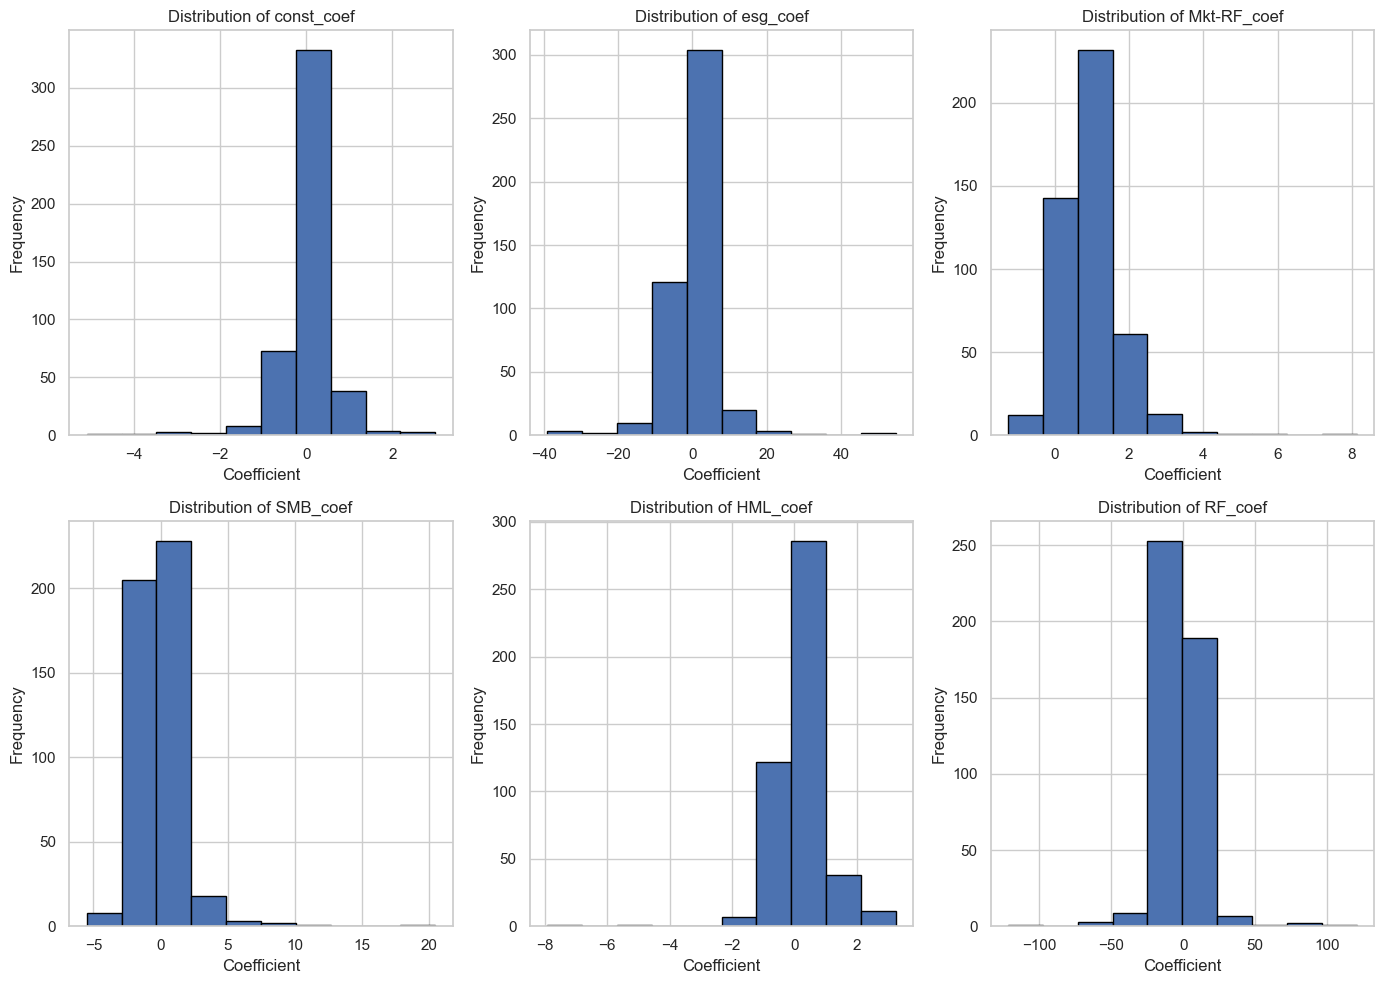

In [38]:
# Plot histograms for each coefficient
coeff_columns = ["const_coef", "esg_coef", "Mkt-RF_coef", "SMB_coef", "HML_coef", "RF_coef"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(coeff_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(sp500_results_df_esg[col].dropna(), bins=10, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Coefficient")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

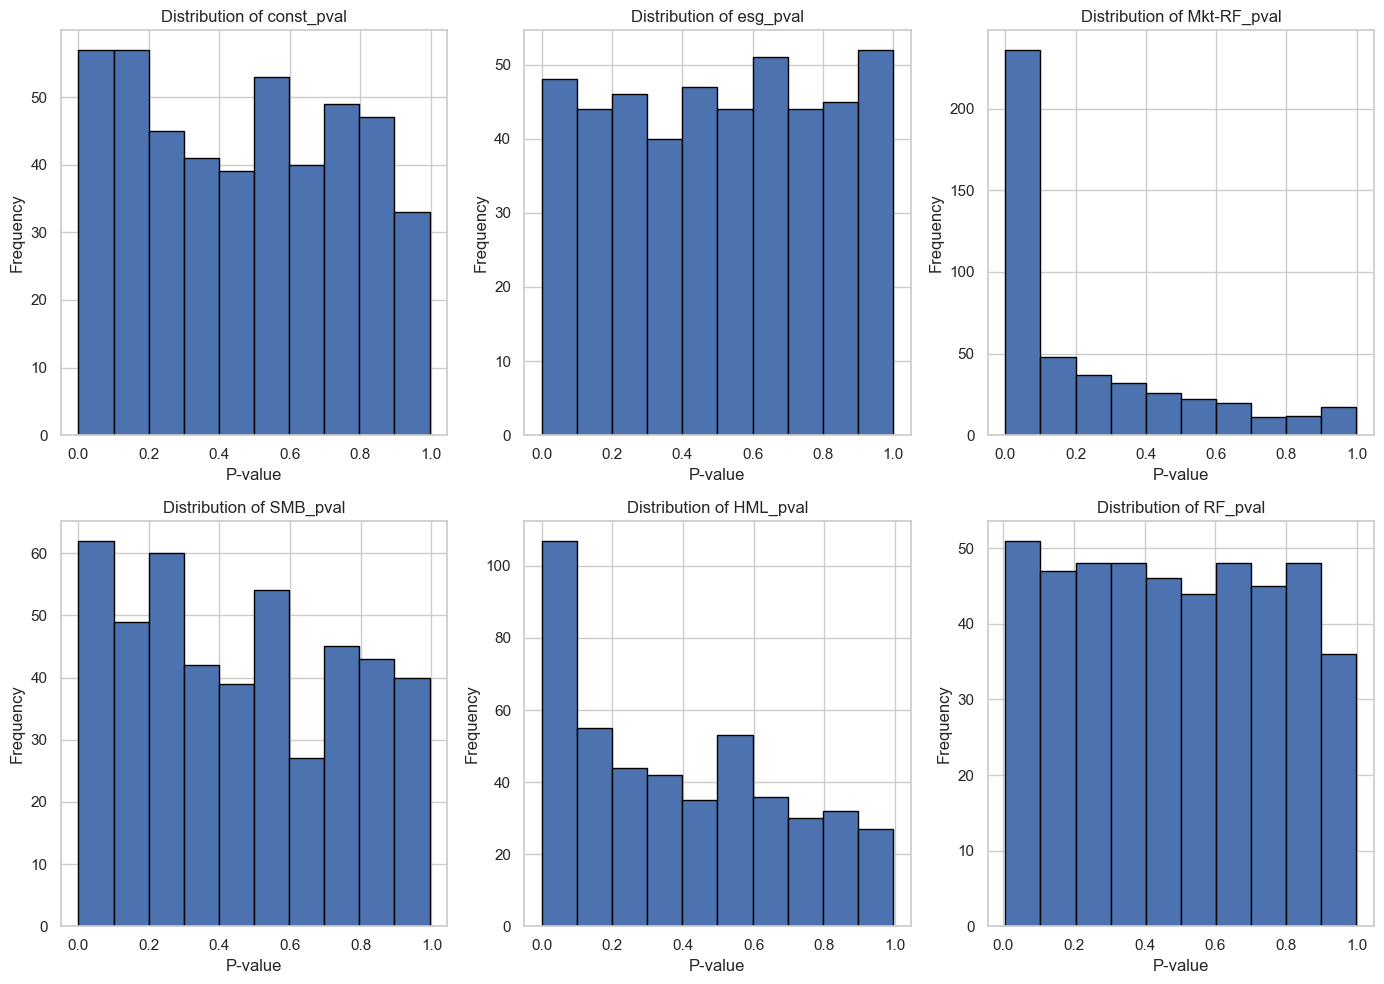

In [39]:
# Plot histograms for each coefficient
pval_columns = ["const_pval", "esg_pval", "Mkt-RF_pval", "SMB_pval", "HML_pval", "RF_pval"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(pval_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(sp500_results_df_esg[col].dropna(), bins=10, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel("P-value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Prepare data DAX 50 ESG

In [10]:
ff3_europe = pd.read_excel(r"YOUR_PATH")
data_dax50_esg = pd.read_csv(r"YOUR_PATH").drop(columns="Unnamed: 0")
data_dax50_esg["return"] = data_dax50_esg.groupby("isin")["price"].apply(lambda x: (x / x.shift(1)) - 1).reset_index(level=0, drop=True)
data_dax50_esg.date = pd.to_datetime(data_dax50_esg.date)

In [11]:
data_dax50_returns = data_dax50_esg.pivot(index="date", columns="isin", values="return")
data_dax50_environmental = data_dax50_esg.groupby(["isin", data_dax50_esg["date"].dt.year])["environmental_normalized"].first().unstack(level=0)
data_dax50_social = data_dax50_esg.groupby(["isin", data_dax50_esg["date"].dt.year])["social_normalized"].first().unstack(level=0)
data_dax50_governance = data_dax50_esg.groupby(["isin", data_dax50_esg["date"].dt.year])["governance_normalized"].first().unstack(level=0)
data_dax50_esg = data_dax50_esg.groupby(["isin", data_dax50_esg["date"].dt.year])["esg_normalized"].first().unstack(level=0)

In [12]:
# Calculate annual returns for each permno
dax50_annual_returns_yearly = data_dax50_returns.resample("A").apply(lambda x: (x + 1).prod() - 1)
dax50_annual_returns_yearly.replace(0, np.nan, inplace=True)
dax50_annual_returns_yearly.index = dax50_annual_returns_yearly.index.year
dax50_annual_returns_yearly

/var/folders/_0/g08w2m052w15pxnz_l6xqngm0000gn/T/ipykernel_2081/1024325148.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  dax50_annual_returns_yearly = data_dax50_returns.resample('A').apply(lambda x: (x + 1).prod() - 1)


isin,CH0038389992,DE0005089031,DE0005103006,DE0005104400,DE0005111702,DE0005137004,DE0005140008,DE0005158703,DE0005190003,DE0005194005,...,LU0775917882,LU1673108939,LU1704650164,NL0000235190,NL0012044747,NL0015001WM6,US00486H1059,US5165571051,US7434762024,US8250641086
date,,,,,,,,,,,,,,,,,,,,,
2012,0.439979,0.204239,0.030021,0.311455,-0.291921,0.009507,0.122110,0.205582,0.424977,0.235666,...,0.452079,NaN,NaN,0.220405,NaN,0.261524,NaN,NaN,NaN,NaN
2013,0.655750,0.922109,-0.060302,0.540990,0.627798,1.112419,0.074744,0.657575,0.209868,0.102640,...,0.543400,NaN,NaN,0.922077,NaN,0.231620,NaN,NaN,NaN,NaN
2014,0.794036,0.227137,-0.200535,0.166565,0.268269,-0.582614,-0.225390,0.357024,0.085271,-0.054119,...,0.810389,NaN,NaN,-0.251120,NaN,0.143203,NaN,NaN,NaN,NaN
2015,0.412320,0.377035,2.719064,1.157635,1.213798,-0.092790,-0.075062,0.358977,0.118650,-0.129078,...,0.779851,0.168403,NaN,0.556820,NaN,0.297265,NaN,NaN,NaN,NaN
2016,0.018925,-0.259718,-0.305935,-0.211810,-0.167808,0.299485,-0.234194,0.138187,-0.050780,0.042064,...,-0.180474,-0.037173,NaN,0.023637,-0.035714,0.062288,NaN,NaN,NaN,NaN
2017,0.131116,0.571822,-0.217803,0.444766,0.237037,-0.202152,0.042915,0.425494,0.017946,0.119208,...,0.181469,0.592417,0.437505,0.360109,0.716667,-0.016844,NaN,NaN,-0.231422,NaN
2018,-0.019935,-0.323385,0.036111,0.076187,-0.208916,-0.141235,-0.556503,-0.011923,-0.149037,-0.197555,...,-0.003004,0.163406,-0.051764,0.014720,-0.188781,0.133247,NaN,NaN,-0.440284,NaN
2019,0.234116,-0.232303,0.293365,0.895588,-0.281749,-0.151240,0.009848,0.862214,0.089118,0.138204,...,0.171825,0.144101,0.053397,0.604564,0.156915,0.026297,NaN,NaN,-0.028663,NaN
2020,0.184570,0.192124,-0.127318,1.233802,0.988290,0.639727,0.293920,0.436106,0.042059,0.260852,...,0.019340,-0.215588,0.387883,-0.308913,2.406897,0.393602,NaN,0.252746,-0.011936,0.071944


In [13]:
# Keep only permnos with at least 10 years of data
non_nan_counts = dax50_annual_returns_yearly.notna().sum()
columns_to_keep = non_nan_counts[non_nan_counts >= 10].index
dax50_annual_returns_yearly = dax50_annual_returns_yearly[columns_to_keep]
dax50_annual_returns_yearly

isin,CH0038389992,DE0005089031,DE0005103006,DE0005104400,DE0005111702,DE0005137004,DE0005140008,DE0005158703,DE0005190003,DE0005194005,...,DE000SYM9999,DE000TLX1005,DE000TUAG505,DE000WCH8881,DE000ZAL1111,GB0059822006,LU0061462528,LU0775917882,NL0000235190,NL0015001WM6
date,,,,,,,,,,,,,,,,,,,,,
2012,0.439979,0.204239,0.030021,0.311455,-0.291921,0.009507,0.122110,0.205582,0.424977,0.235666,...,0.331807,0.173840,0.589509,-0.212994,NaN,0.028627,0.070498,0.452079,0.220405,0.261524
2013,0.655750,0.922109,-0.060302,0.540990,0.627798,1.112419,0.074744,0.657575,0.209868,0.102640,...,0.260429,0.198608,0.525672,0.637311,NaN,0.176006,0.505624,0.543400,0.922077,0.231620
2014,0.794036,0.227137,-0.200535,0.166565,0.268269,-0.582614,-0.225390,0.357024,0.085271,-0.054119,...,0.524308,0.071549,0.165398,0.139693,0.186047,0.875600,-0.082637,0.810389,-0.251120,0.143203
2015,0.412320,0.377035,2.719064,1.157635,1.213798,-0.092790,-0.075062,0.358977,0.118650,-0.129078,...,0.239845,0.182893,0.243024,-0.137093,0.427451,0.061040,0.025568,0.779851,0.556820,0.297265
2016,0.018925,-0.259718,-0.305935,-0.211810,-0.167808,0.299485,-0.234194,0.138187,-0.050780,0.042064,...,-0.043681,0.165944,-0.172715,0.305900,-0.003022,0.290857,-0.044298,-0.180474,0.023637,0.062288
2017,0.131116,0.571822,-0.217803,0.444766,0.237037,-0.202152,0.042915,0.425494,0.017946,0.119208,...,0.255486,0.115627,0.349026,0.674778,0.215624,-0.353915,0.018116,0.181469,0.360109,-0.016844
2018,-0.019935,-0.323385,0.036111,0.076187,-0.208916,-0.141235,-0.556503,-0.011923,-0.149037,-0.197555,...,-0.088179,-0.090692,-0.257482,-0.497741,-0.491329,-0.131407,-0.261583,-0.003004,0.014720,0.133247
2019,0.234116,-0.232303,0.293365,0.895588,-0.281749,-0.151240,0.009848,0.862214,0.089118,0.138204,...,0.469620,0.545246,-0.004126,-0.113170,1.013369,1.001331,0.000546,0.171825,0.604564,0.026297
2020,0.184570,0.192124,-0.127318,1.233802,0.988290,0.639727,0.293920,0.436106,0.042059,0.260852,...,0.167051,-0.247884,-0.522374,0.737330,1.015494,-0.009311,-0.096397,0.019340,-0.308913,0.393602


In [14]:
# Do the same selection for communication data
data_dax50_environmental = data_dax50_environmental[columns_to_keep]
data_dax50_social = data_dax50_social[columns_to_keep]
data_dax50_governance = data_dax50_governance[columns_to_keep]
data_dax50_esg = data_dax50_esg[columns_to_keep]

In [15]:
dax50_combined_data = pd.DataFrame({
    "year": np.repeat(dax50_annual_returns_yearly.index, dax50_annual_returns_yearly.shape[1]),
    "isin": np.tile(dax50_annual_returns_yearly.columns, len(dax50_annual_returns_yearly)),
    "return": dax50_annual_returns_yearly.values.ravel(),
    "environmental": data_dax50_environmental.values.ravel(),
    "social": data_dax50_social.values.ravel(),
    "governance": data_dax50_governance.values.ravel(),
    "esg": data_dax50_esg.values.ravel()
})
dax50_combined_data = dax50_combined_data.dropna().sort_values(by=["isin", "year"]).reset_index(drop=True)
dax50_combined_data

,year,isin,return,environmental,social,governance,esg
0,2012,DE0005089031,0.204239,0.013952,0.059772,0.319706,0.113207
1,2013,DE0005089031,0.922109,0.037698,0.110962,0.289936,0.138404
2,2014,DE0005089031,0.227137,0.033434,0.113561,0.303859,0.140944
3,2015,DE0005089031,0.377035,0.027728,0.123305,0.268154,0.131133
4,2016,DE0005089031,-0.259718,0.030327,0.154578,0.270193,0.145419
...,...,...,...,...,...,...,...
783,2019,NL0015001WM6,0.026297,0.140886,0.219911,0.465565,0.291532
784,2020,NL0015001WM6,0.393602,0.169240,0.427551,0.540429,0.410512
785,2021,NL0015001WM6,0.154083,0.419585,0.620198,0.657108,0.664958
786,2022,NL0015001WM6,-0.040431,0.382061,0.734394,0.758486,0.716806


# Scatter Plots annual returns - communication score DAX 50 ESG

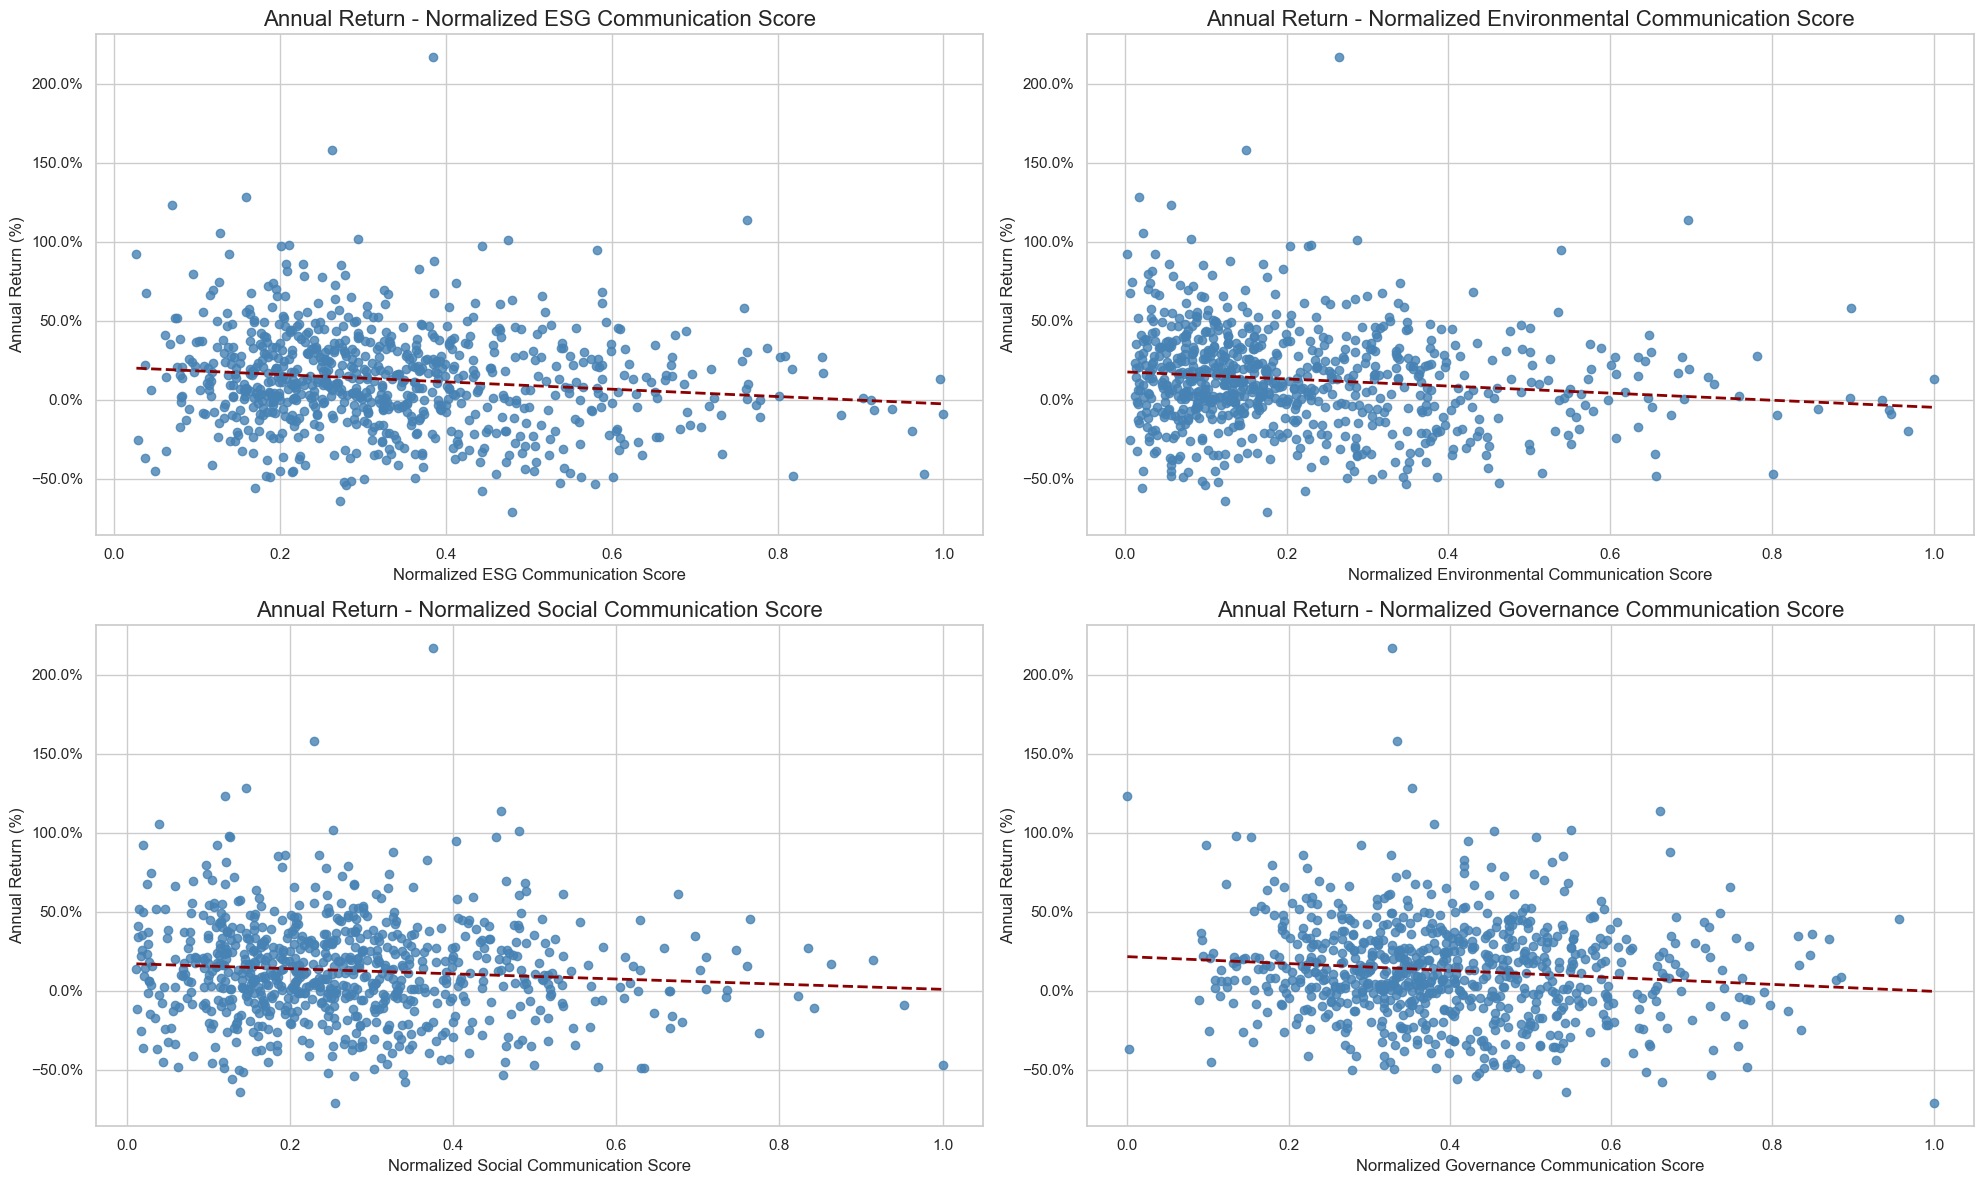

In [16]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the score names and plot the scatter plots
for i, score_name in enumerate(["esg", "environmental", "social", "governance"]):
    score_data = dax50_combined_data[score_name]
    display_name = "ESG" if score_name == "esg" else score_name.capitalize()
    plot_score_vs_return(axes[i], display_name, score_data, dax50_combined_data["return"])

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("YOUR_PATH")
plt.show()

# Correlation Matrix DAX 50 ESG

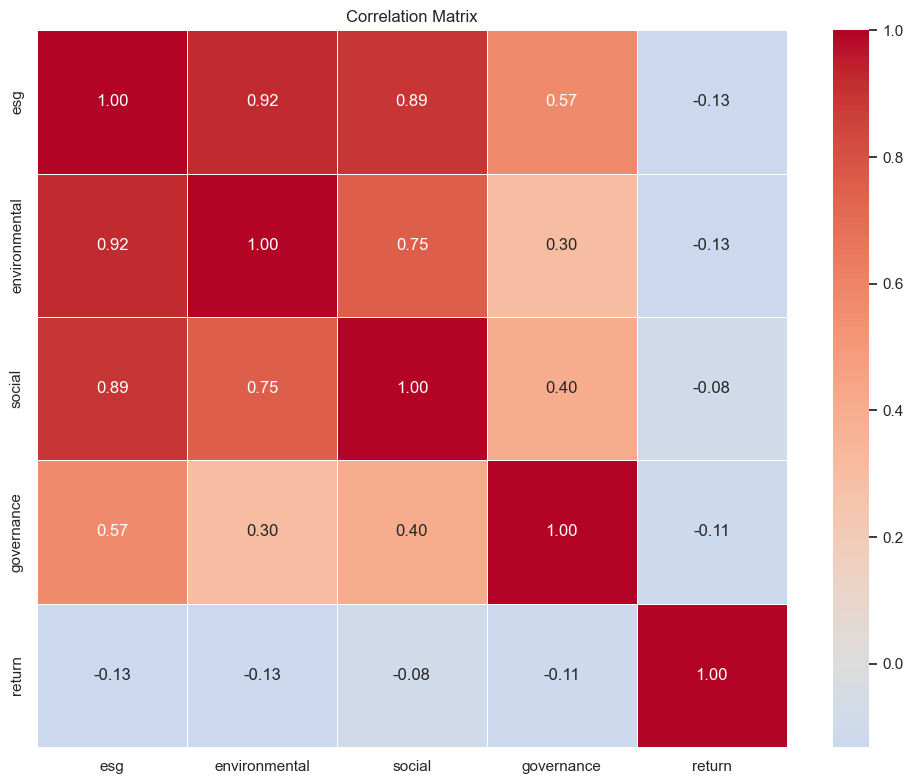

In [47]:
# Compute the correlation matrix
correlation_data = dax50_combined_data[["esg", "environmental", "social", "governance", "return"]]
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig(
    f"YOUR_PATH"
)
plt.show()

# FF3 Regression on yearly returns and yearly communication score - DAX 50 ESG

In [48]:
# Merge with the multi index dataframe
merged_df_dax = dax50_combined_data.reset_index().merge(ff3_europe, on="year").set_index(["isin", "year"])
merged_df_dax = merged_df_dax.sort_index()
merged_df_dax

index    return  environmental    social  governance  \
isin         year                                                         
DE0005089031 2012      0  0.204239       0.013952  0.059772    0.319706   
             2013      1  0.922109       0.037698  0.110962    0.289936   
             2014      2  0.227137       0.033434  0.113561    0.303859   
             2015      3  0.377035       0.027728  0.123305    0.268154   
             2016      4 -0.259718       0.030327  0.154578    0.270193   
...                  ...       ...            ...       ...         ...   
NL0015001WM6 2019    783  0.026297       0.140886  0.219911    0.465565   
             2020    784  0.393602       0.169240  0.427551    0.540429   
             2021    785  0.154083       0.419585  0.620198    0.657108   
             2022    786 -0.040431       0.382061  0.734394    0.758486   
             2023    787 -0.161884       0.396015  0.668441    0.740837   

                        esg  Mkt-RF     SMB     HML      RF  
isin         year                                            
DE0005089031 2012  0.113207  0.2077  0.0121  0.0190  0.0006  
             2013  0.138404  0.2800  0.0858  0.1035  0.0002  
             2014  0.140944 -0.0634 -0.0236 -0.0529  0.0002  
             2015  0.131133 -0.0051  0.1057 -0.1675  0.0002  
             2016  0.145419 -0.0004  0.0411  0.1108  0.0020  
...                     ...     ...     ...     ...     ...  
NL0015001WM6 2019  0.291532  0.2181 -0.0118 -0.1177  0.0214  
             2020  0.410512  0.0923  0.1486 -0.3011  0.0044  
             2021  0.664958  0.1677 -0.0212  0.0498  0.0004  
             2022  0.716806 -0.1861 -0.0901  0.1915  0.0142  
             2023  0.694150  0.1337 -0.0867  0.0913  0.0495  

[788 rows x 10 columns]

In [49]:
# FF3 on environmental factor
results = []
for isin in merged_df_dax.index.get_level_values(0).unique():
    # Filter data for the current isin
    data = merged_df_dax.loc[isin]
    
    # Define Y and X variables
    Y = data["return"]
    X = data[["environmental", "Mkt-RF", "SMB", "HML", "RF"]]
    
    # Add a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Fit the regression model
    model = sm.OLS(Y, X).fit()
    
    # Extract coefficients and p-values
    coeffs = model.params
    pvals = model.pvalues
    
    # Store the results in a dictionary
    result = {
        "isin": isin,
        "const_coef": coeffs["const"],
        "const_pval": pvals["const"],
        "environmental_coef": coeffs["environmental"],
        "environmental_pval": pvals["environmental"],
        "Mkt-RF_coef": coeffs["Mkt-RF"],
        "Mkt-RF_pval": pvals["Mkt-RF"],
        "SMB_coef": coeffs["SMB"],
        "SMB_pval": pvals["SMB"],
        "HML_coef": coeffs["HML"],
        "HML_pval": pvals["HML"],
        "RF_coef": coeffs["RF"],
        "RF_pval": pvals["RF"]
    }
    
    results.append(result)

# Convert results to a DataFrame
results_df_environmental = pd.DataFrame(results).set_index("isin")
results_df_environmental

,const_coef,const_pval,environmental_coef,environmental_pval,Mkt-RF_coef,Mkt-RF_pval,SMB_coef,SMB_pval,HML_coef,HML_pval,RF_coef,RF_pval
isin,,,,,,,,,,,,
DE0005089031,0.020747,0.963870,-1.538854,0.902533,1.094301,0.207243,3.093524,0.288727,0.774011,0.495341,3.655478,0.771596
DE0005140008,-0.344988,0.001118,4.344478,0.001232,0.896341,0.005111,0.617671,0.418381,-0.315978,0.313228,-1.360801,0.634794
DE0005158703,0.218936,0.184344,-0.921108,0.357221,1.257319,0.048144,0.282839,0.871439,-0.886907,0.246741,7.350258,0.317146
DE0005200000,0.107489,0.376420,-0.198652,0.542244,0.423248,0.346652,0.143092,0.921830,0.387331,0.519793,3.831766,0.518951
DE0005313704,1.005506,0.078632,-17.768092,0.152045,1.020321,0.175360,-2.510279,0.279339,-0.101638,0.924671,-1.125157,0.915119
...,...,...,...,...,...,...,...,...,...,...,...,...
DE000WCH8881,-0.201400,0.601659,0.480036,0.580502,0.317826,0.694777,5.340392,0.104246,1.229532,0.269971,4.682340,0.639058
DE000ZAL1111,0.083344,0.863916,-0.182420,0.943846,1.270311,0.257576,0.396150,0.908455,-2.535530,0.201738,-2.550016,0.894945
LU0061462528,-0.037481,0.875262,0.527018,0.851388,0.702772,0.086980,0.332674,0.769861,0.634891,0.205407,-4.413938,0.352677


In [50]:
averaged_results_environmental = results_df_environmental.mean()
averaged_results_environmental

const_coef            0.106889
const_pval            0.443811
environmental_coef   -0.719240
environmental_pval    0.473487
Mkt-RF_coef           0.947170
Mkt-RF_pval           0.243959
SMB_coef             -0.311183
SMB_pval              0.554799
HML_coef             -0.109439
HML_pval              0.524785
RF_coef              -3.065244
RF_pval               0.509143
dtype: float64

In [87]:
len(results_df_environmental[results_df_environmental["environmental_pval"]<=0.05])

3

In [51]:
significant_dax_results_df_environmental = results_df_environmental[results_df_environmental["environmental_pval"]<=0.05]
significant_dax_results_df_environmental.mean()

const_coef            0.275429
const_pval            0.013223
environmental_coef    0.023451
environmental_pval    0.014137
Mkt-RF_coef           0.923096
Mkt-RF_pval           0.021315
SMB_coef             -0.626967
SMB_pval              0.440210
HML_coef             -0.609552
HML_pval              0.262048
RF_coef               0.019750
RF_pval               0.343030
dtype: float64

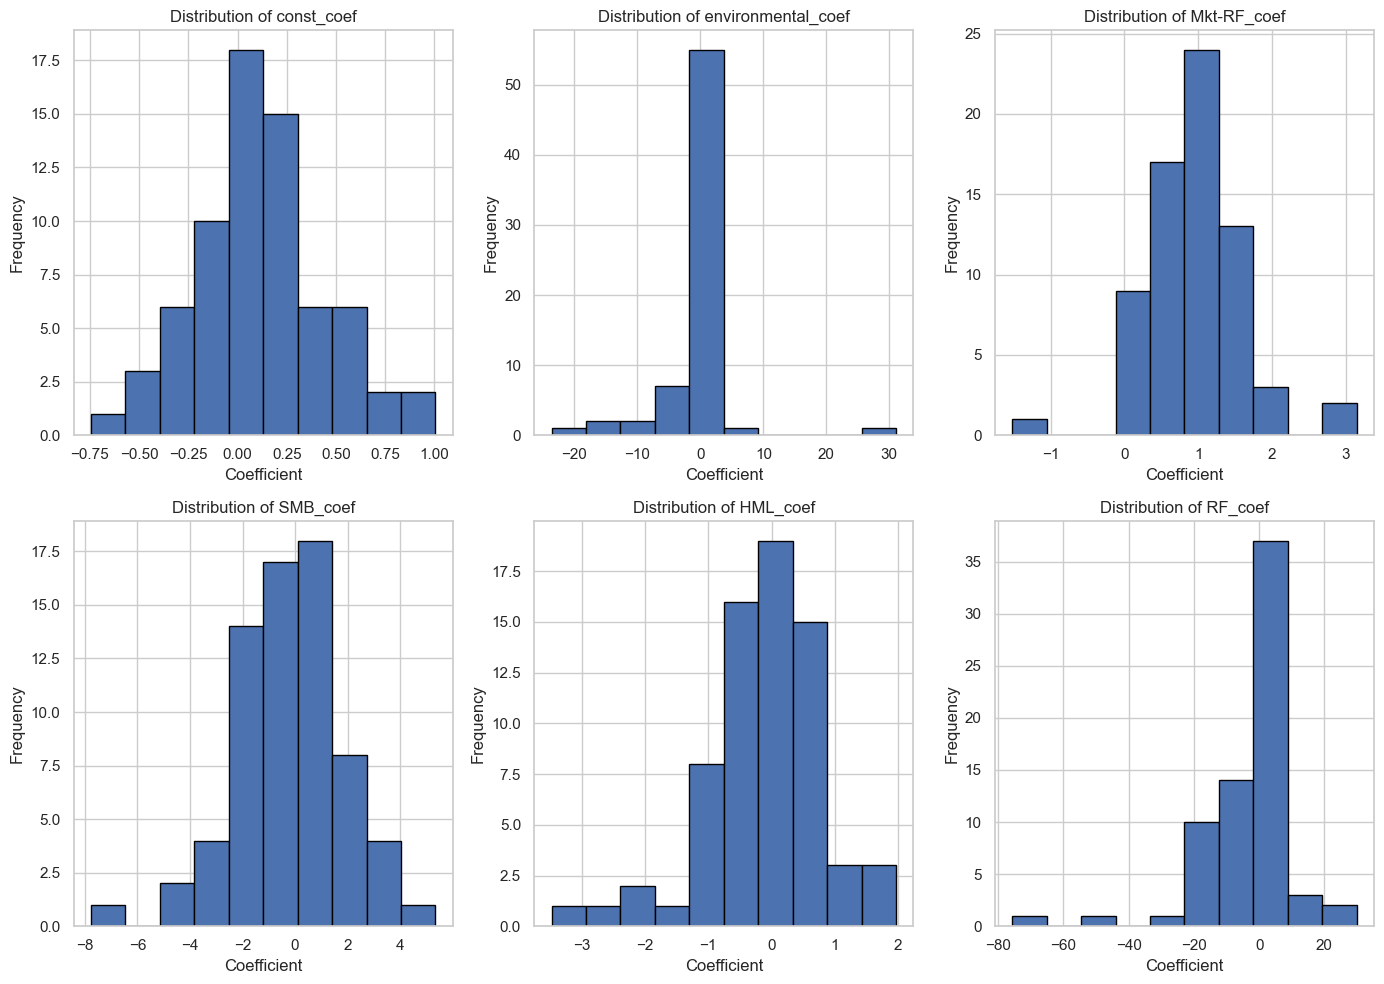

In [53]:
# Plot histograms for each coefficient
coeff_columns = ["const_coef", "environmental_coef", "Mkt-RF_coef", "SMB_coef", "HML_coef", "RF_coef"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(coeff_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(results_df_environmental[col].dropna(), bins=10, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Coefficient")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

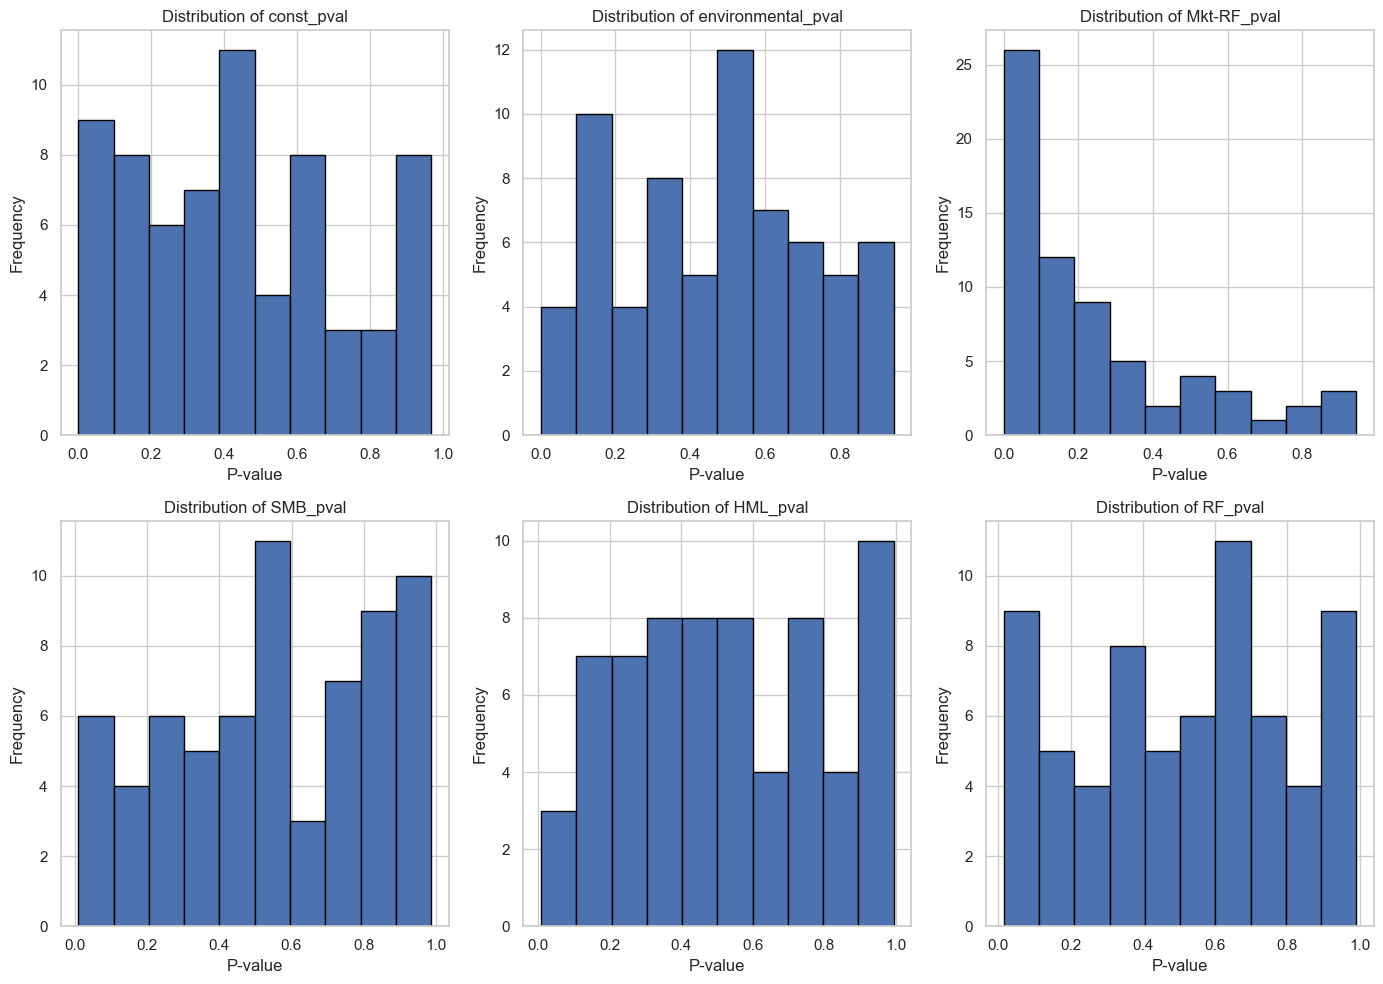

In [54]:
# Plot histograms for each coefficient
pval_columns = ["const_pval", "environmental_pval", "Mkt-RF_pval", "SMB_pval", "HML_pval", "RF_pval"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(pval_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(results_df_environmental[col].dropna(), bins=10, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel("P-value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [55]:
# FF3 on social factor
results = []
for isin in merged_df_dax.index.get_level_values(0).unique():
    # Filter data for the current isin
    data = merged_df_dax.loc[isin]
    
    # Define Y and X variables
    Y = data["return"]
    X = data[["social", "Mkt-RF", "SMB", "HML", "RF"]]
    
    # Add a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Fit the regression model
    model = sm.OLS(Y, X).fit()
    
    # Extract coefficients and p-values
    coeffs = model.params
    pvals = model.pvalues
    
    # Store the results in a dictionary
    result = {
        "isin": isin,
        "const_coef": coeffs["const"],
        "const_pval": pvals["const"],
        "social_coef": coeffs["social"],
        "social_pval": pvals["social"],
        "Mkt-RF_coef": coeffs["Mkt-RF"],
        "Mkt-RF_pval": pvals["Mkt-RF"],
        "SMB_coef": coeffs["SMB"],
        "SMB_pval": pvals["SMB"],
        "HML_coef": coeffs["HML"],
        "HML_pval": pvals["HML"],
        "RF_coef": coeffs["RF"],
        "RF_pval": pvals["RF"]
    }
    
    results.append(result)

# Convert results to a DataFrame
results_df_social = pd.DataFrame(results).set_index("isin")
results_df_social

,const_coef,const_pval,social_coef,social_pval,Mkt-RF_coef,Mkt-RF_pval,SMB_coef,SMB_pval,HML_coef,HML_pval,RF_coef,RF_pval
isin,,,,,,,,,,,,
DE0005089031,0.332966,0.582402,-3.292948,0.534293,0.869877,0.331587,3.870731,0.208902,1.028388,0.387274,5.762942,0.606628
DE0005140008,-0.732387,0.059718,4.368380,0.085364,0.753961,0.118544,0.728309,0.623759,-0.177025,0.760944,0.911602,0.866994
DE0005158703,0.381294,0.112972,-1.089224,0.193152,1.138681,0.057395,0.662732,0.684305,-0.867176,0.221742,10.170785,0.186812
DE0005200000,0.139438,0.439221,-0.160290,0.597901,0.389703,0.395656,0.166246,0.909970,0.371321,0.540656,3.851415,0.527455
DE0005313704,0.629369,0.312347,-3.419920,0.521405,1.504452,0.089998,-2.309214,0.386162,-0.974965,0.366143,-8.929113,0.402204
...,...,...,...,...,...,...,...,...,...,...,...,...
DE000WCH8881,-0.321741,0.447982,1.404415,0.425851,0.478942,0.529638,4.829448,0.094630,1.297733,0.236612,-2.478440,0.850238
DE000ZAL1111,0.046450,0.920429,0.014174,0.989517,1.285339,0.249138,0.331208,0.936124,-2.624815,0.215629,-3.684516,0.798537
LU0061462528,-0.102707,0.452770,0.630998,0.376159,0.691918,0.061856,0.309729,0.770132,0.594575,0.201533,-5.640294,0.224186


In [56]:
# Average each of the coefficients and p-values
averaged_results_social = results_df_social.mean()
averaged_results_social

const_coef     0.059082
const_pval     0.442608
social_coef    0.108987
social_pval    0.509592
Mkt-RF_coef    0.941970
Mkt-RF_pval    0.247294
SMB_coef      -0.282496
SMB_pval       0.542477
HML_coef      -0.156881
HML_pval       0.479892
RF_coef       -1.842818
RF_pval        0.521478
dtype: float64

In [88]:
len(results_df_social[results_df_social["social_pval"]<=0.05])

2

In [57]:
significant_dax_results_df_social = results_df_social[results_df_social["social_pval"]<=0.05]
significant_dax_results_df_social.mean()

const_coef    -1.375529
const_pval     0.039625
social_coef    6.310848
social_pval    0.035756
Mkt-RF_coef    1.386593
Mkt-RF_pval    0.081683
SMB_coef       0.683902
SMB_pval       0.746315
HML_coef       0.155823
HML_pval       0.845591
RF_coef       -7.359272
RF_pval        0.146893
dtype: float64

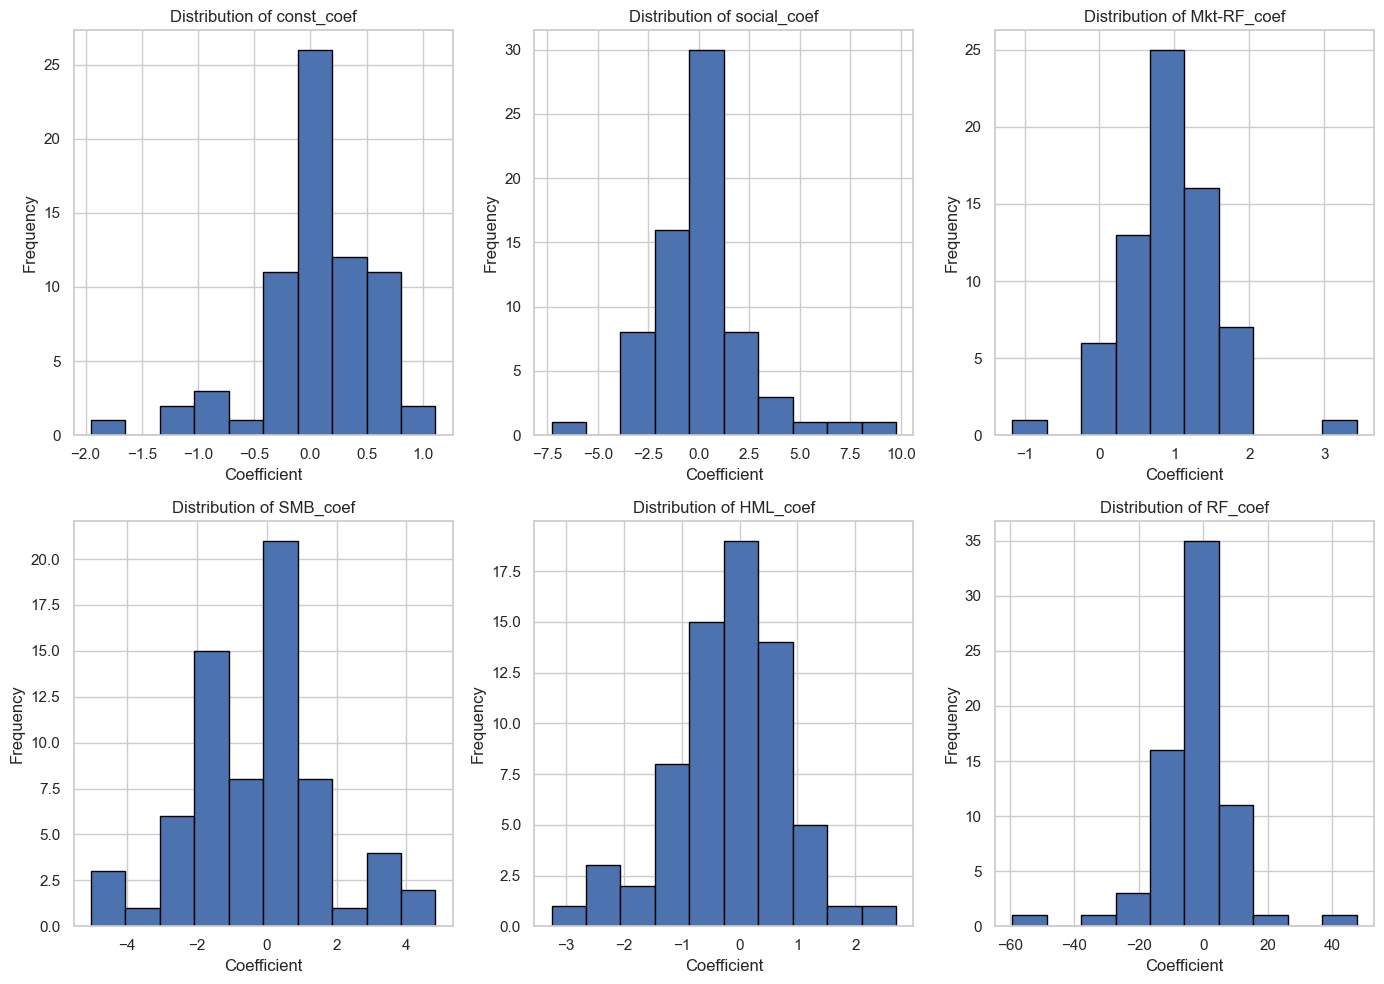

In [59]:
# Plot histograms for each coefficient
coeff_columns = ["const_coef", "social_coef", "Mkt-RF_coef", "SMB_coef", "HML_coef", "RF_coef"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(coeff_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(results_df_social[col].dropna(), bins=10, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Coefficient")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

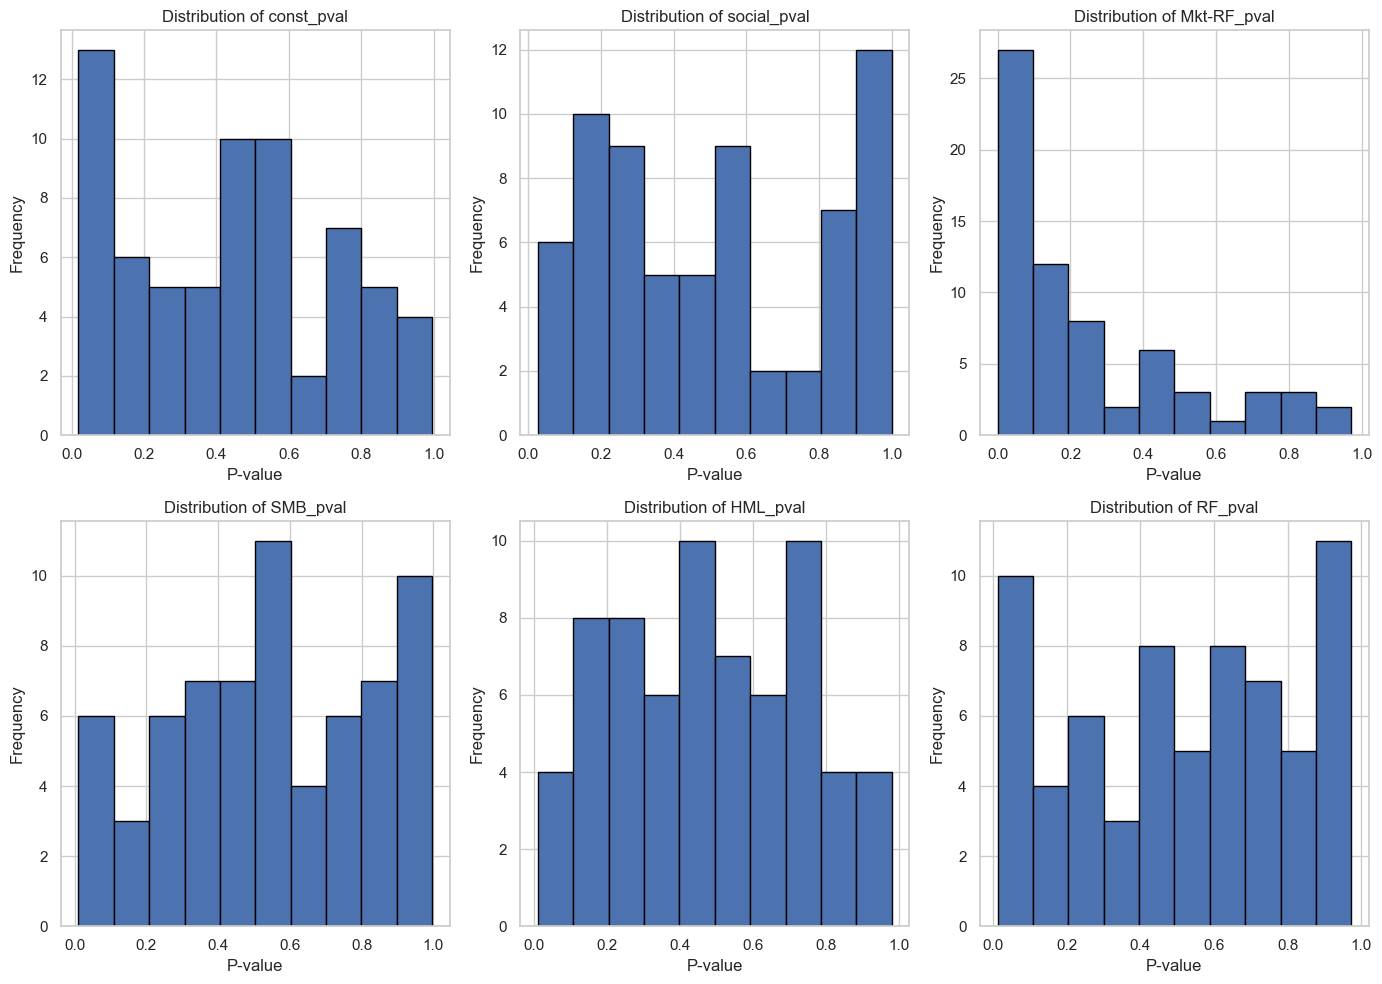

In [60]:
# Plot histograms for each coefficient
pval_columns = ["const_pval", "social_pval", "Mkt-RF_pval", "SMB_pval", "HML_pval", "RF_pval"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(pval_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(results_df_social[col].dropna(), bins=10, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel("P-value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [61]:
# FF3 on governance factor
results = []
for isin in merged_df_dax.index.get_level_values(0).unique():
    # Filter data for the current isin
    data = merged_df_dax.loc[isin]
    
    # Define Y and X variables
    Y = data["return"]
    X = data[["governance", "Mkt-RF", "SMB", "HML", "RF"]]
    
    # Add a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Fit the regression model
    model = sm.OLS(Y, X).fit()
    
    # Extract coefficients and p-values
    coeffs = model.params
    pvals = model.pvalues
    
    # Store the results in a dictionary
    result = {
        "isin": isin,
        "const_coef": coeffs["const"],
        "const_pval": pvals["const"],
        "governance_coef": coeffs["governance"],
        "governance_pval": pvals["governance"],
        "Mkt-RF_coef": coeffs["Mkt-RF"],
        "Mkt-RF_pval": pvals["Mkt-RF"],
        "SMB_coef": coeffs["SMB"],
        "SMB_pval": pvals["SMB"],
        "HML_coef": coeffs["HML"],
        "HML_pval": pvals["HML"],
        "RF_coef": coeffs["RF"],
        "RF_pval": pvals["RF"]
    }
    
    results.append(result)

# Convert results to a DataFrame
results_df_governance = pd.DataFrame(results).set_index("isin")
results_df_governance

,const_coef,const_pval,governance_coef,governance_pval,Mkt-RF_coef,Mkt-RF_pval,SMB_coef,SMB_pval,HML_coef,HML_pval,RF_coef,RF_pval
isin,,,,,,,,,,,,
DE0005089031,0.205542,0.761383,-0.699700,0.718685,1.129097,0.193318,2.900636,0.319530,0.716034,0.522385,3.508153,0.738009
DE0005140008,-0.439393,0.214412,1.042981,0.308081,0.962551,0.093857,0.137697,0.935474,0.017349,0.980353,-1.715395,0.809739
DE0005158703,0.823443,0.083972,-2.796174,0.116669,1.424323,0.015811,0.646304,0.670571,-1.244427,0.081781,13.325929,0.109425
DE0005200000,0.577865,0.206734,-1.320540,0.242708,0.476658,0.256025,-0.212918,0.876338,0.159201,0.781240,5.501005,0.340655
DE0005313704,0.738163,0.156391,-1.277189,0.307686,1.572339,0.067154,-2.968872,0.252312,-0.884092,0.387227,-8.858575,0.365272
...,...,...,...,...,...,...,...,...,...,...,...,...
DE000WCH8881,-0.391366,0.293086,1.544869,0.262489,0.384492,0.592305,4.887347,0.077810,1.324137,0.205509,-1.066773,0.917908
DE000ZAL1111,0.209212,0.718536,-0.353870,0.773191,1.293022,0.239440,0.311353,0.926529,-2.535494,0.134282,-1.750571,0.899358
LU0061462528,-0.102608,0.471509,0.459727,0.399902,0.758481,0.046736,0.493908,0.648935,0.621416,0.184396,-5.072020,0.253081


In [62]:
# Average each of the coefficients and p-values
averaged_results_governance = results_df_governance.mean()
averaged_results_governance

const_coef         0.147184
const_pval         0.368974
governance_coef   -0.101877
governance_pval    0.383837
Mkt-RF_coef        0.907347
Mkt-RF_pval        0.220348
SMB_coef          -0.273665
SMB_pval           0.537329
HML_coef          -0.170902
HML_pval           0.469830
RF_coef           -2.458381
RF_pval            0.462178
dtype: float64

In [89]:
len(results_df_governance[results_df_governance["governance_pval"]<=0.05])

5

In [65]:
significant_dax_results_df_governance = [results_df_governance["governance_pval"]<=0.05]
significant_dax_results_df_governance.mean()

const_coef        -0.164713
const_pval         0.036919
governance_coef    0.962120
governance_pval    0.027876
Mkt-RF_coef        1.150822
Mkt-RF_pval        0.056270
SMB_coef          -0.356512
SMB_pval           0.530511
HML_coef          -0.321243
HML_pval           0.406778
RF_coef           -3.983751
RF_pval            0.155312
dtype: float64

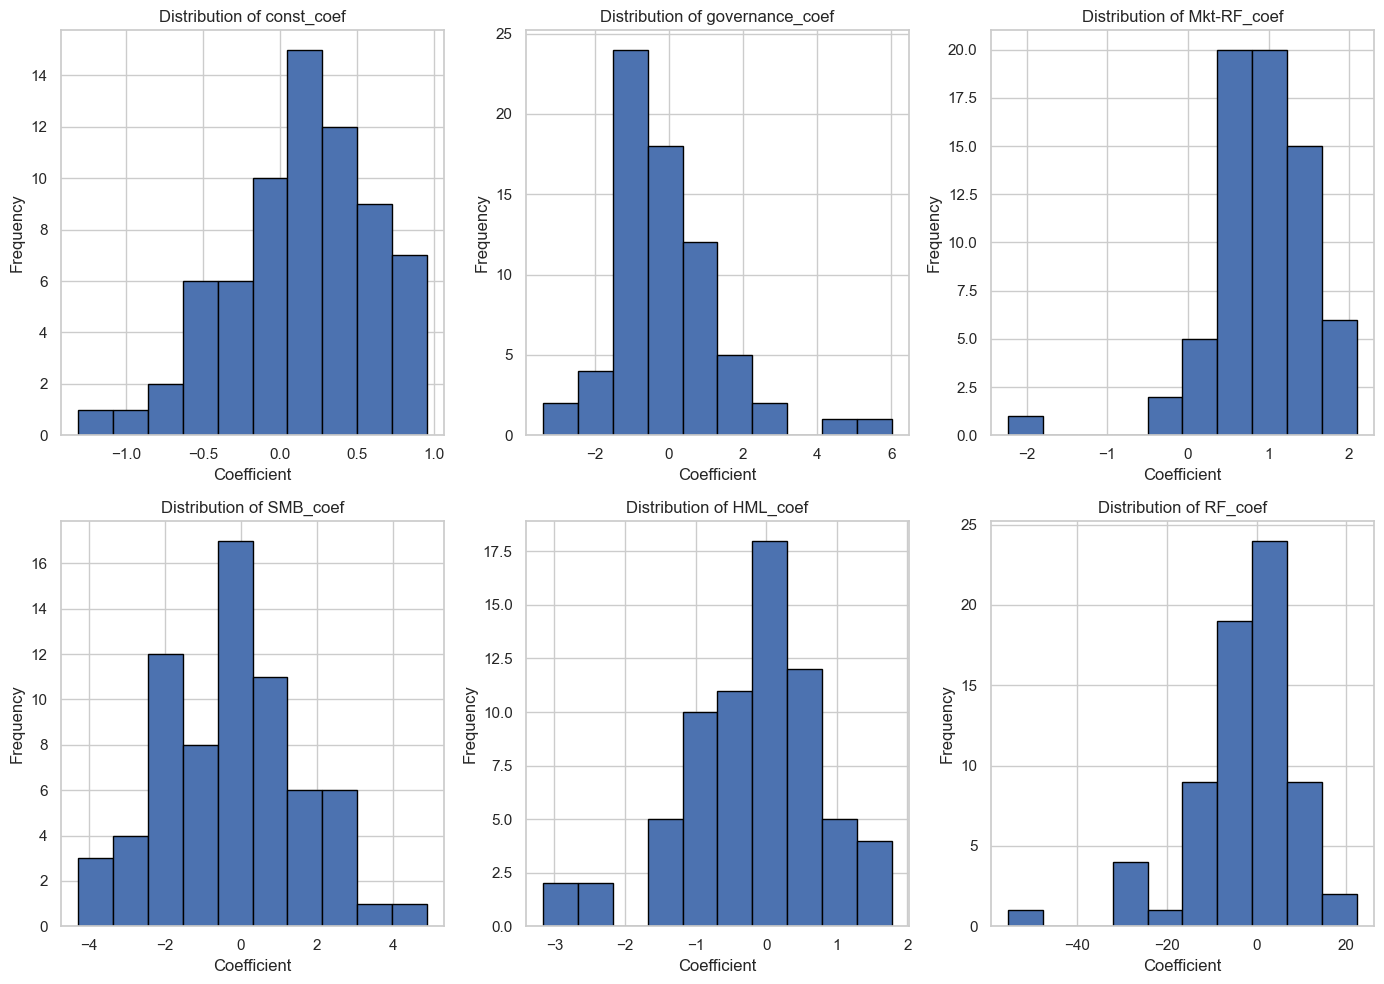

In [66]:
# Plot histograms for each coefficient
coeff_columns = ["const_coef", "governance_coef", "Mkt-RF_coef", "SMB_coef", "HML_coef", "RF_coef"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(coeff_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(results_df_governance[col].dropna(), bins=10, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Coefficient")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

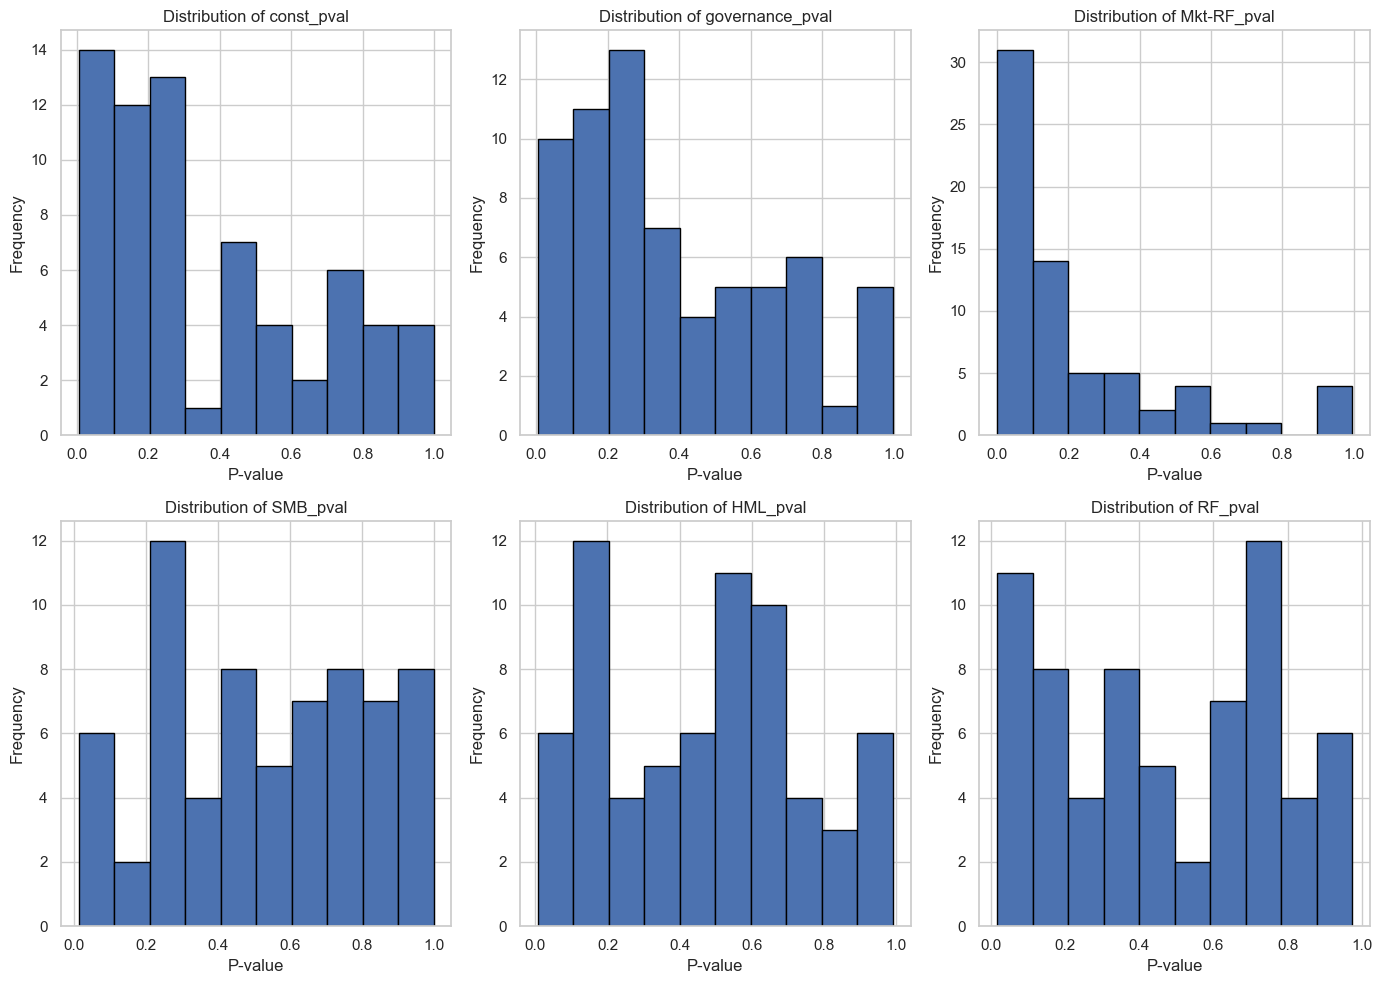

In [67]:
# Plot histograms for each coefficient
pval_columns = ["const_pval", "governance_pval", "Mkt-RF_pval", "SMB_pval", "HML_pval", "RF_pval"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(pval_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(results_df_governance[col].dropna(), bins=10, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel("P-value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [70]:
# FF3 on ESG factor
results = []
for isin in merged_df_dax.index.get_level_values(0).unique():
    # Filter data for the current isin
    data = merged_df_dax.loc[isin]
    
    # Define Y and X variables
    Y = data["return"]
    X = data[["esg", "Mkt-RF", "SMB", "HML", "RF"]]
    
    # Add a constant to the model (intercept)
    X = sm.add_constant(X)
    
    # Fit the regression model
    model = sm.OLS(Y, X).fit()
    
    # Extract coefficients and p-values
    coeffs = model.params
    pvals = model.pvalues
    
    # Store the results in a dictionary
    result = {
        "isin": isin,
        "const_coef": coeffs["const"],
        "const_pval": pvals["const"],
        "esg_coef": coeffs["esg"],
        "esg_pval": pvals["esg"],
        "Mkt-RF_coef": coeffs["Mkt-RF"],
        "Mkt-RF_pval": pvals["Mkt-RF"],
        "SMB_coef": coeffs["SMB"],
        "SMB_pval": pvals["SMB"],
        "HML_coef": coeffs["HML"],
        "HML_pval": pvals["HML"],
        "RF_coef": coeffs["RF"],
        "RF_pval": pvals["RF"]
    }
    
    results.append(result)

# Convert results to a DataFrame
results_df_esg = pd.DataFrame(results).set_index("isin")
results_df_esg

,const_coef,const_pval,esg_coef,esg_pval,Mkt-RF_coef,Mkt-RF_pval,SMB_coef,SMB_pval,HML_coef,HML_pval,RF_coef,RF_pval
isin,,,,,,,,,,,,
DE0005089031,0.472215,0.582363,-3.349661,0.551351,1.048661,0.213879,3.008395,0.281876,0.827139,0.453859,6.062032,0.599519
DE0005140008,-0.589075,0.020553,2.840856,0.032457,0.901197,0.042620,0.504506,0.688094,-0.092209,0.854328,-2.244962,0.649883
DE0005158703,0.364866,0.122735,-1.113565,0.211066,1.203372,0.045799,0.441660,0.786986,-0.888806,0.215293,9.655178,0.204515
DE0005200000,0.146626,0.379390,-0.198635,0.523428,0.407869,0.363549,0.136149,0.925383,0.369294,0.538105,4.036515,0.501901
DE0005313704,1.015872,0.108574,-4.579231,0.195692,1.584283,0.053483,-2.857929,0.240651,-0.701121,0.473159,-6.048546,0.528168
...,...,...,...,...,...,...,...,...,...,...,...,...
DE000WCH8881,-0.293564,0.471287,0.744553,0.447445,0.328021,0.671419,5.353687,0.085247,1.261582,0.249173,2.366256,0.816093
DE000ZAL1111,0.172618,0.825183,-0.325790,0.873203,1.257700,0.258580,0.658530,0.865194,-2.366603,0.292951,-1.171974,0.952202
LU0061462528,-0.148785,0.395598,0.898358,0.347930,0.701210,0.056952,0.391094,0.710344,0.586581,0.204050,-5.791519,0.212410


In [71]:
# Average each of the coefficients and p-values
averaged_results_esg = results_df_esg.mean()
averaged_results_esg

const_coef     0.108310
const_pval     0.436191
esg_coef       0.029398
esg_pval       0.462374
Mkt-RF_coef    0.912894
Mkt-RF_pval    0.242855
SMB_coef      -0.238819
SMB_pval       0.560664
HML_coef      -0.119978
HML_pval       0.501975
RF_coef       -2.275451
RF_pval        0.497870
dtype: float64

In [90]:
len(results_df_esg[results_df_esg["esg_pval"]<=0.05])

3

In [77]:
significant_dax_results_df_esg = results_df_esg[results_df_esg["esg_pval"]<=0.05]
significant_dax_results_df_esg.mean()

const_coef     -0.175715
const_pval      0.024283
esg_coef        0.838423
esg_pval        0.030008
Mkt-RF_coef     1.183814
Mkt-RF_pval     0.040768
SMB_coef       -0.939322
SMB_pval        0.516275
HML_coef       -0.304748
HML_pval        0.513893
RF_coef       -10.501824
RF_pval         0.291598
dtype: float64

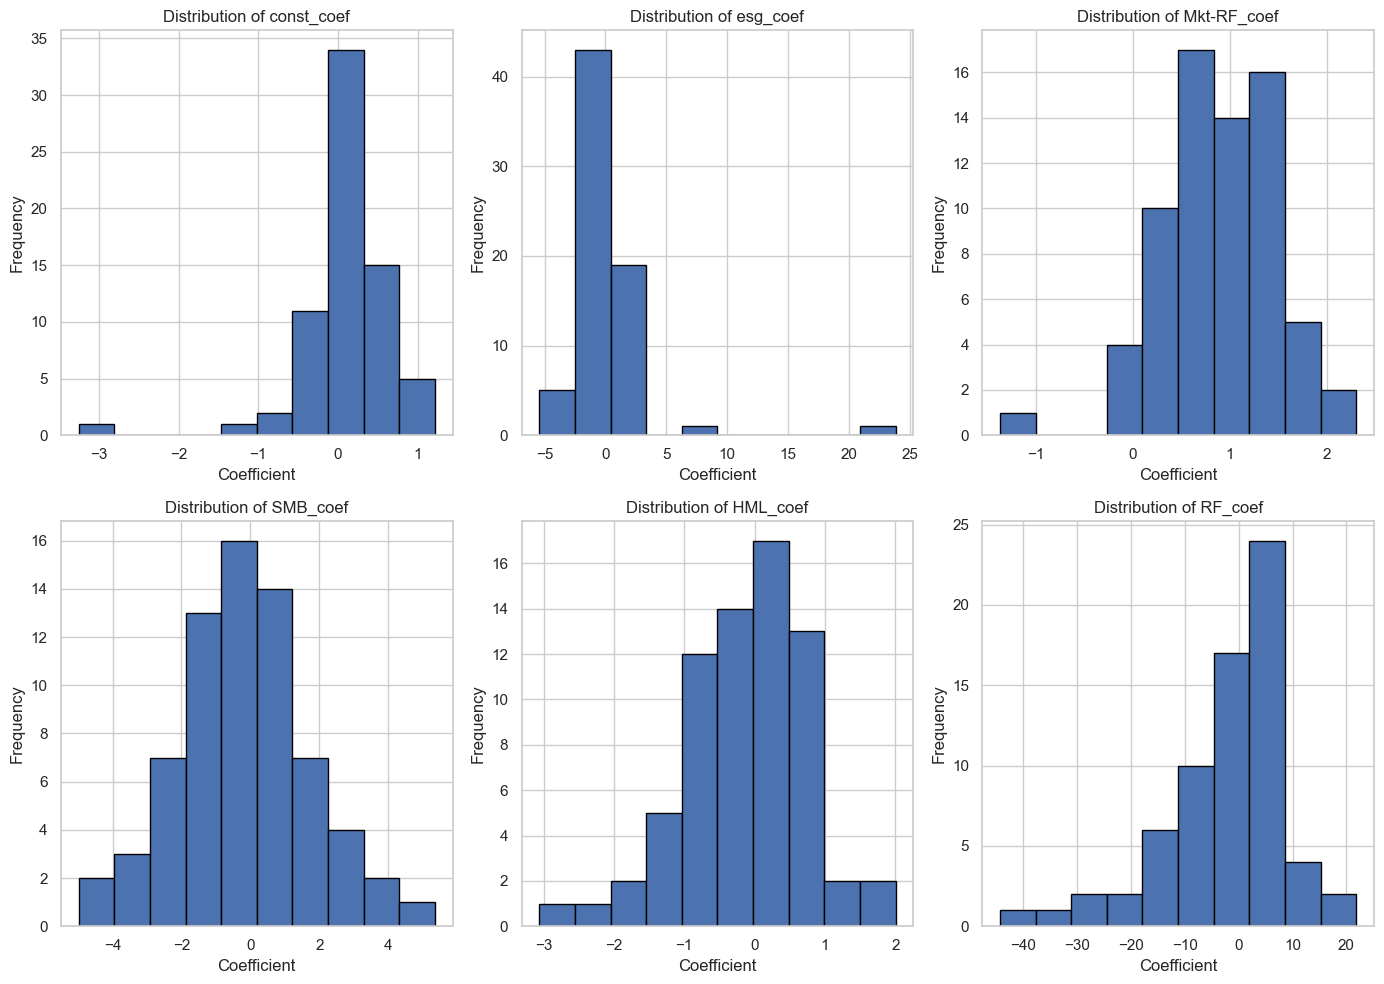

In [79]:
# Plot histograms for each coefficient
coeff_columns = ["const_coef", "esg_coef", "Mkt-RF_coef", "SMB_coef", "HML_coef", "RF_coef"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(coeff_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(results_df_esg[col].dropna(), bins=10, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Coefficient")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

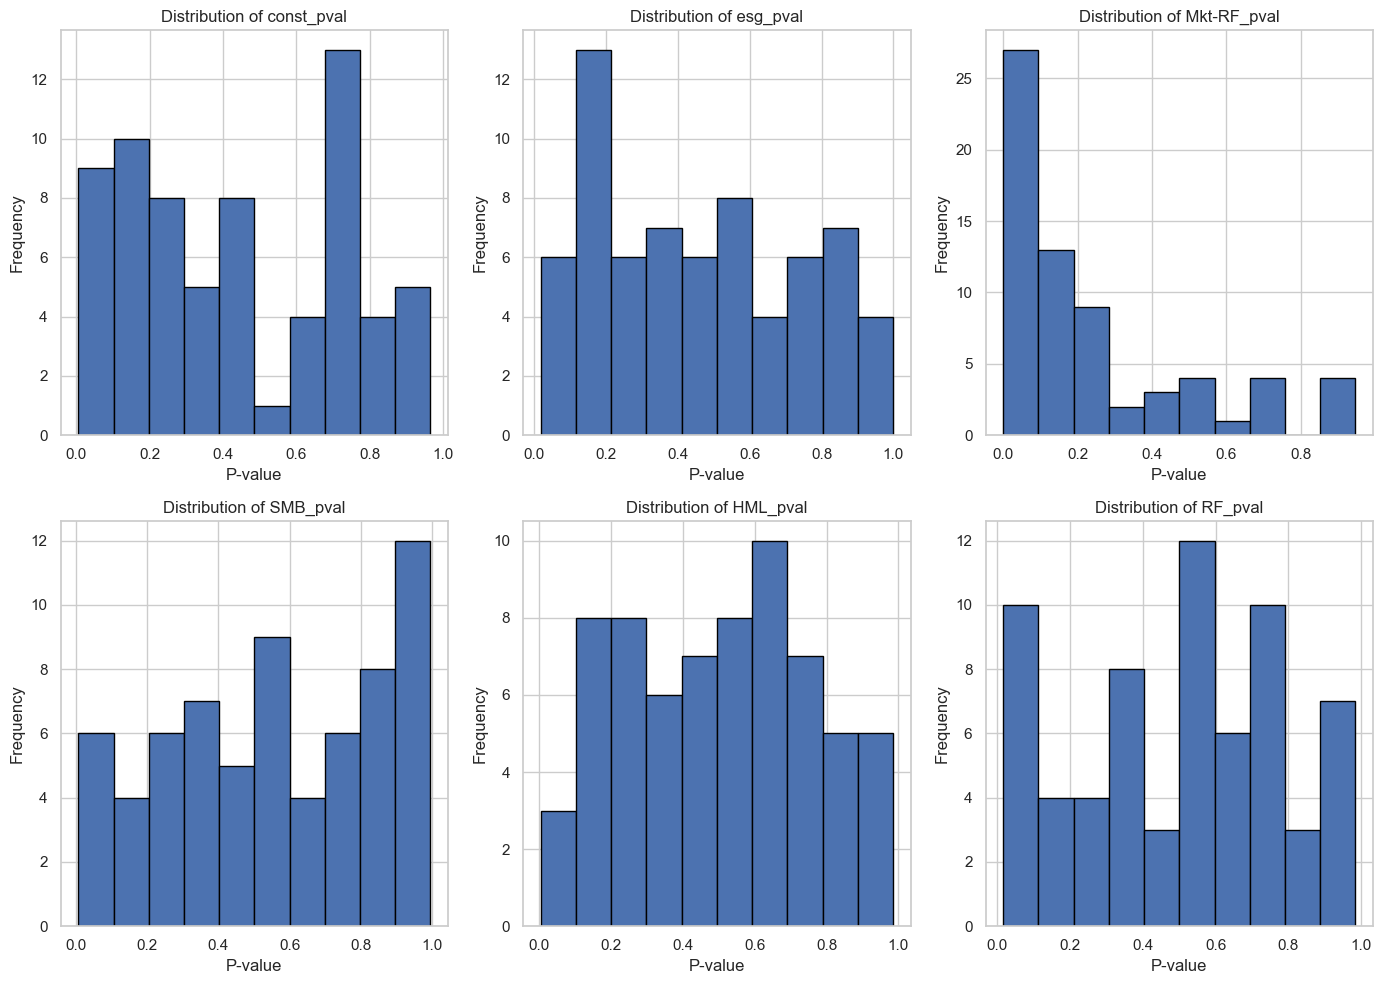

In [80]:
# Plot histograms for each coefficient
pval_columns = ["const_pval", "esg_pval", "Mkt-RF_pval", "SMB_pval", "HML_pval", "RF_pval"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(pval_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(results_df_esg[col].dropna(), bins=10, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel("P-value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()